# DEMENTIA SEQ (freeze9/topmed joint call)
# Chromosome X haplotype blocks estimation and PCA calculations: LBD (path + clin) vs. Controls (DementiaSeq, Wellderly, LNG) 

**Start date:** 07-27-2020

**Updated date:** 01-20-2024

**Author(s):** Ruth Chia

**Working directory on biowulf:** `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS`

In [1]:
!pwd

/vf/users/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM


## What to do
1. Run haplotype block estimation using the following plink parameters to estimate the number of haploblocks so that the appropriate bonferroni threshold can be applied. 
> --blocks-min-maf 0.01 \
>--blocks \
>--blocks-max-kb 1000

2. To run the code on the chromosome X and autosomes for the LBD dataset, and two additional european WGS genome datasets from 1000G and Topmed. This will help establish if the number of haploblocks on chromosome X vs autosomes are truly different and independent of the datasets that were used.

3. **Needed as part of the revision of the manuscript for NPJ submission:** Run flashpca on a pruned and merged LBD dataset containing autosomes and chromosome X to get the genomic PCs that will be used for covariate adjustment in the XWAS. For comparison, will generate genetic PCs from autosomes only, and X chromosome only --> run XWAS with these as well to see how the results are different. 


## What files I need
1. QC-ed plink files for LBD dataset:
-  autosomes: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS/merged.clean/FINAL.QC.males.females.noPAR.chrX.bed/bim/fam`
    -  x chromosome: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/CLEAN.UNRELATED/FILTERED.LBD.controls.UNRELATED_chr${CHNUM}.pgen/pvar/psam`

___

2. Plink files for euro-topmed:
    - chr 1-22, X: `/data/ALS_50k/ALSmega.v2/AdditionalData_Sept2021/dbgap_topmed_freeze8/merged.topmed_6k.freeze8.hg38/subset_euro_only/topmed.freeze8.hg38_euro_chr${CHNUM}.pgen/pvar/psam`. These are QC plink files for autosomes; for x chromosome - will need to remove PAR region.

___

3. Plink files for euro-1000G:
    - chr 1-22, X to be downloaded from `http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/`; then run appropariate filter to keep only european samples and X-specific QC.




## Run haplotype block estimation for LBD datset

In [ ]:
%%bash
#mkdir Est.Haplotypes
cd Est.Haplotypes
module load plink/1.9.0-beta4.4

DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS"

plink \
--bfile $DIR/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--chr 23 \
--keep ../SampleList.inXWAS.txt \
--hwe 0.000001 midp \
--maf 0.01 \
--blocks-min-maf 0.01 \
--blocks \
--blocks-max-kb 1000 \
--out DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chrX

In [ ]:
import numpy as np
np.log10(0.05/6296)

In [ ]:
(0.05/6296)

In [ ]:
%%bash
cd Est.Haplotypes
module load plink/1.9.0-beta4.4

DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS"

plink \
--bfile $DIR/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--chr 23 \
--keep ../SampleList.inXWAS.txt \
--hwe 0.000001 midp \
--maf 0.01 \
--blocks-min-maf 0.01 \
--blocks \
--blocks-max-kb 200 \
--out DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock200kb_chrX


In [1]:
%%bash
cd Est.Haplotypes
wc -l DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chrX.blocks
wc -l DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock200kb_chrX.blocks

6296 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chrX.blocks
6463 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock200kb_chrX.blocks


## ***NEW 08-30-2023:*** Estimate number of haplotype blocks on all other autosomes

clean + QCed plink files for autosome estimation blocks: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/CLEAN.UNRELATED/FILTERED.LBD.controls.UNRELATED_chr${CHNUM}.pgen/pvar/psam`

In [ ]:
%%bash
#mkdir Est.Haplotypes_autosomes
cd Est.Haplotypes_autosomes


module load plink/3.6-alpha

for CHNUM in {1..22}
do
plink2 \
--pfile /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/CLEAN.UNRELATED/FILTERED.LBD.controls.UNRELATED_chr${CHNUM} \
--maf 0.01 \
--make-bed \
--threads 32 \
--out temp_DementiaSeq.LBD.controls.noDups.UNRELATED.chr${CHNUM}
done

In [ ]:
%%bash
cd Est.Haplotypes_autosomes

#module load plink/1.9.0-beta4.4

for CHNUM in {1..22}
do
echo "plink \
--bfile temp_DementiaSeq.LBD.controls.noDups.UNRELATED.chr${CHNUM} \
--keep ../SampleList.inXWAS.txt \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks \
--blocks-max-kb 1000 \
--threads 32 \
--out DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr${CHNUM}" >> haplo.swarm
done

swarm --file haplo.swarm --logdir swarmOE -g 120 -t auto --time 04:00:00 --module plink/1.9.0-beta4.4 --sbatch '--constraint=ibfdr' --partition quick

In [ ]:
!jobhist 7379418 | grep "7379418_"

In [ ]:
%%bash
cd Est.Haplotypes_autosomes

#module load plink/1.9.0-beta4.4

for CHNUM in {1..22}
do
echo "plink \
--bfile temp_DementiaSeq.LBD.controls.noDups.UNRELATED.chr${CHNUM} \
--keep ../SampleList.inXWAS.txt \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks \
--blocks-max-kb 200 \
--threads 32 \
--out DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock200kb_chr${CHNUM}" >> haplo.200kb.swarm
done

swarm --file haplo.200kb.swarm --logdir swarmOE -g 120 -t auto --time 02:30:00 --module plink/1.9.0-beta4.4 --sbatch '--constraint=ibfdr' --partition quick

In [ ]:
!jobhist 7379449 | grep "7379449_"

In [2]:
%%bash
cd Est.Haplotypes_autosomes
wc -l DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr*.blocks
wc -l DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock200kb_chr*.blocks

    15008 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr1.blocks
    10389 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr10.blocks
     9872 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr11.blocks
     9653 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr12.blocks
     7146 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr13.blocks
     6897 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr14.blocks
     7648 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr15.blocks
     9623 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr16.blocks
     7417 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr17.blocks
     6765 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr18.blocks
     6403 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr19.blocks
    17203 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr2.blocks
     6136 DementiaSeq.LBD.controls.noDups.

### Plot summary comparing blocks between chromosome X and autosomes from the LBD case/control cohort

In [ ]:
%%bash
cd Est.Haplotypes_autosomes/

# first concatenate the file from autosomes
head -n 1 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr1.blocks.det > DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_ALLautosomes.blocks.det
for CHNUM in {1..22}
do
tail -n +2 DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chr${CHNUM}.blocks.det >> DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_ALLautosomes.blocks.det
done


Downloaded chromosome lengths from: `https://www.ncbi.nlm.nih.gov/grc/human/data`. Save as .txt file and save it here in this working directory.

In [3]:
!cat chrom_lengths.txt | column -t

Chromosome  Total_length_(bp)
1           248,956,422
2           242,193,529
3           198,295,559
4           190,214,555
5           181,538,259
6           170,805,979
7           159,345,973
8           145,138,636
9           138,394,717
10          133,797,422
11          135,086,622
12          133,275,309
13          114,364,328
14          107,043,718
15          101,991,189
16          90,338,345
17          83,257,441
18          80,373,285
19          58,617,616
20          64,444,167
21          46,709,983
22          50,818,468
X           156,040,895
Y           57,227,415


In [ ]:
%%bash
cd Est.Haplotypes_autosomes/

# make summary plots of number of variants per block and length per block

module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library("ggrepel")

xchrom <- fread("../Est.Haplotypes/DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_chrX.blocks.det")
autosomes <- fread("DementiaSeq.LBD.controls.noDups.UNRELATED.maxblock1000kb_ALLautosomes.blocks.det")
dim(xchrom)
dim(autosomes)

blocks <- rbind(xchrom,autosomes)
blocks <- blocks %>% arrange(CHR)
dim(blocks)
head(blocks)

chrom_len <- fread("../chrom_lengths.txt")
chrom_len$`Total_length_(bp)` <- gsub(",","",chrom_len$`Total_length_(bp)`)
chrom_len$`Total_length_(bp)` <- as.integer(chrom_len$`Total_length_(bp)`)

# bin groups by NSNPS (every 10 snps)
blocks$Interval_group_num <- findInterval(blocks$NSNPS, seq(25,3000,25))

## give name of upperbound of max NSNPS for each bin
Interval_group_name <- seq(25,3000,25)
Interval_group_num <- seq(1:length(Interval_group_name)[1]+1) - 1
map <- cbind(Interval_group_num,Interval_group_name) %>% data.frame()

## get interval_group_name
blocks_updated <- merge(blocks, map, by="Interval_group_num", all.x=T)
blocks_updated$CHR <- gsub("23","X",blocks_updated$CHR)
blocks_updated$CHR <- factor(blocks_updated$CHR, levels=c(1:22,"X"))
blocks_updated$chr_type <- ifelse(blocks_updated$CHR == "X", "X", "Autosomes")
blocks_updated$chr_type <- factor(blocks_updated$chr_type, levels = c("Autosomes","X"))
blocks_updated$Interval_group_name <- factor(blocks_updated$Interval_group_name)

## calculate NSNPS per block
blocks_updated$NSNPS_per_kb_block <- blocks_updated$NSNPS/blocks_updated$KB

## save out compiled blocks results
blocks_updated$Cohort <- "LBD_case_control"
write.table(blocks_updated, "Merged_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# summarize blocks
summstats <- blocks_updated %>%
             group_by(CHR) %>%
             summarize(total_blocks = n(),
                       shortest_length_kb = min(KB),
                       longest_length_kb = max(KB),
                       mean_length_kb = mean(KB),
                       sd_length_kb = sd(KB),
                       mean_nsnps = mean(NSNPS),
                       sd_nsnps = sd(NSNPS),
                       total_nsnps = sum(NSNPS),
                       mean_nsnps_per_KB_block = mean(NSNPS_per_kb_block),
                       sd_nsnps_per_KB_block = sd(NSNPS_per_kb_block)) %>%
             mutate(Cohort = "LBD_case_control") %>%
             data.frame()
summstats$CHR <- factor(summstats$CHR, levels=c(1:22,"X"))
summstats_final <- merge(summstats, chrom_len, by.x="CHR",by.y="Chromosome",all.x=T)
summstats_final$N_blocks_per_chrom_len <- summstats_final$total_blocks / summstats_final$`Total_length_(bp)`
summstats_final$chr_type <- ifelse(summstats_final$CHR == "X", "X", "Autosomes")
summstats_final$chr_type <- factor(summstats_final$chr_type, levels = c("Autosomes","X"))
write.table(summstats_final, "Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# plot summary
plot <- ggplot(blocks_updated, aes(KB,color= CHR)) + geom_histogram(fill="white", alpha=0.5, position="identity", bins=30) + facet_wrap( ~ CHR, ncol=6)
ggsave("Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_histogram.jpeg", plot, height=5, width=10)


# get median length of blocks for autosomes and X
median_block_length <- median(blocks_updated$KB)
median_block_length

# get median nsnps per kb block length for autosomes and X
median_nsnps_block_length <- median(blocks_updated$NSNPS_per_kb_block)
median_nsnps_block_length

# get upper IQR
library(plyr)
chrom_x = subset(blocks_updated, blocks_updated$CHR == "X")
upper_Q = summary(chrom_x$KB)[5]
IQR = summary(chrom_x$KB)[5] - summary(chrom_x$KB)[2]
outlier_fence = upper_Q + 1.5*IQR
y_max = round_any(outlier_fence[[1]], 10, f=ceiling)
detach(package:plyr,unload=TRUE)

#remotes::install_github('rpkgs/gg.layers')
library(gg.layers)
library(ggplot2)

outlier.colour = NA

plot1 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=KB, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("Haploblock length (KB)") +
        xlab("Chromosome") +
        geom_hline(yintercept=median_block_length, linetype="dashed", color = "red", linewidth = 0.3) +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
        
ggsave("Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg", plot1, height=3, width=5.5)

plot2 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=NSNPS_per_kb_block, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("No. SNPS/haploblock length (KB)") +
        xlab("Chromosome") +
        geom_hline(yintercept=median_nsnps_block_length, linetype="dashed", color = "red", linewidth = 0.3) +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_nsnps_per_blockLength.jpeg", plot2, height=3, width=5.5)

plot3 <- ggplot(blocks_updated) +
        geom_point(aes(x=KB,y=NSNPS, color=chr_type, alpha=0.5), show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Haploblock length (KB)") +
        xlab("No. SNPS") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength_vs_nsnps.jpeg", plot3, height=3, width=5.5)

plot4 <- ggplot(summstats_final) +
        geom_point(aes(x=log10(`Total_length_(bp)`),y=total_blocks, color=chr_type, alpha=0.5), show.legend = FALSE) +
        geom_smooth(data = subset(summstats_final, summstats_final$chr_type == "Autosomes"), aes(x=log10(`Total_length_(bp)`),y=total_blocks, color=chr_type),
                    method = lm, formula = 'y ~ x', show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Total haploblocks") +
        xlab("Chromosome length (log10(bp))") +
        geom_label_repel(data = subset(summstats_final, summstats_final$chr_type == "X"),
                         aes(x=log10(`Total_length_(bp)`),y=total_blocks,label=CHR),
                         size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1,
                         fill = "NA", label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg", plot4, height=3, width=5.5)

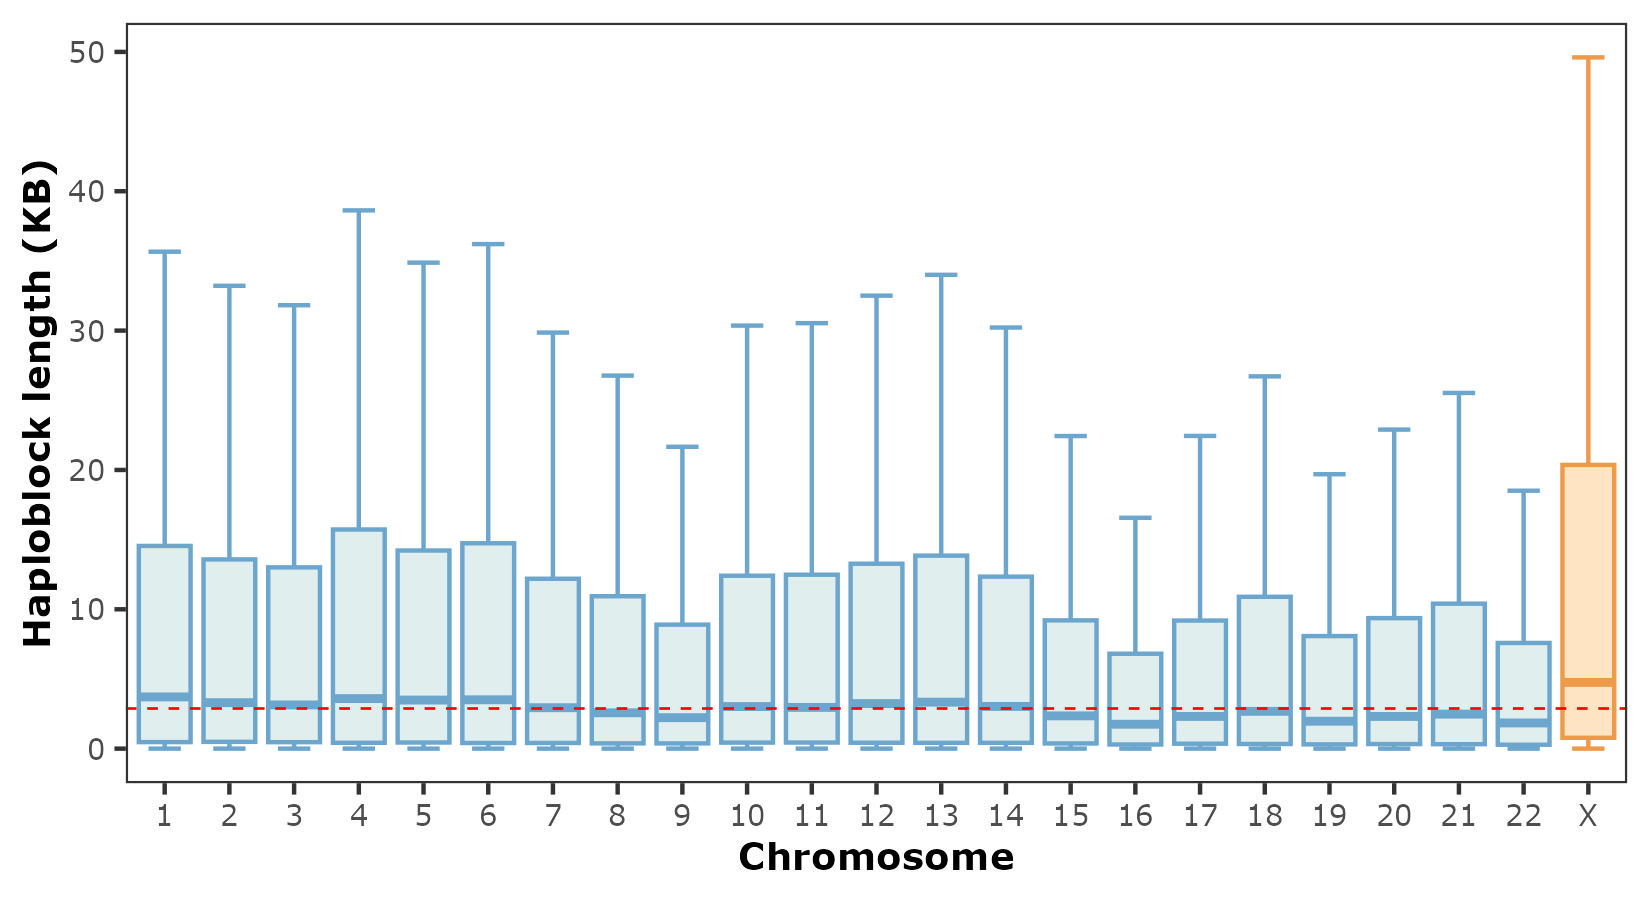

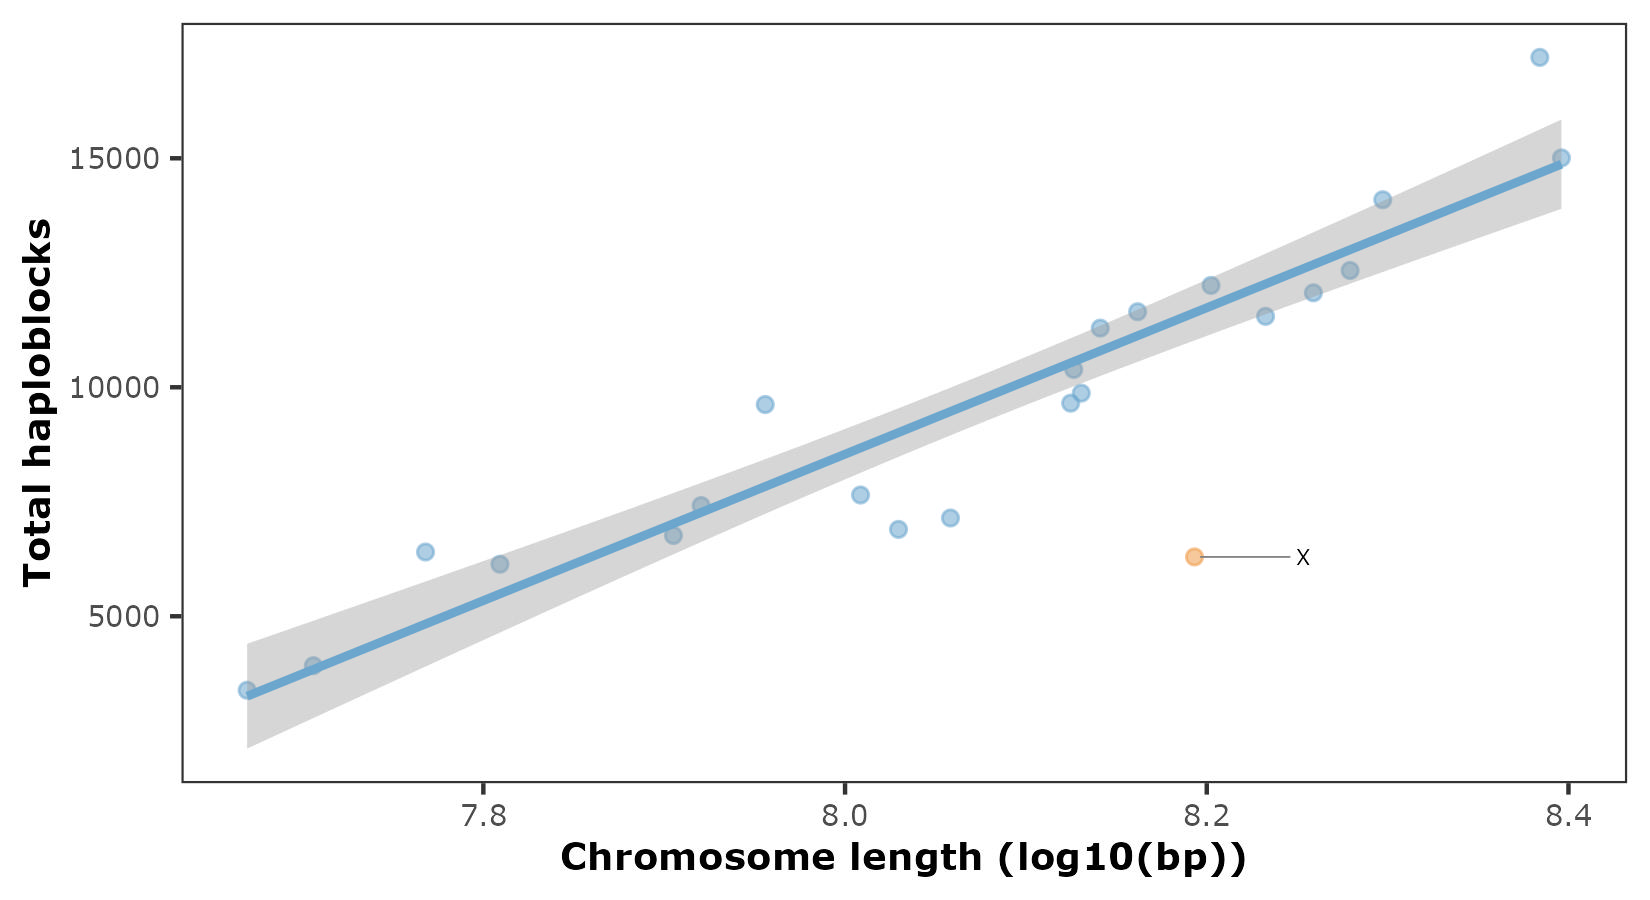

In [4]:
from IPython.display import display
from PIL import Image

plot="Est.Haplotypes_autosomes/Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg"
display(Image.open(plot))

plot="Est.Haplotypes_autosomes/Summary_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg"
display(Image.open(plot))


## ***NEW 08-31-2023:*** Estimate number of haplotype blocks on topmed genomes (chr1-22,X)

clean + QCed plink files for autosome estimation blocks: `/data/ALS_50k/ALSmega.v2/AdditionalData_Sept2021/dbgap_topmed_freeze8/merged.topmed_6k.freeze8.hg38/subset_euro_only/topmed.freeze8.hg38_euro_chr${CHNUM}.pgen/pvar/psam`

In [ ]:
%%bash
mkdir Est.Haplotypes_topmed
cd Est.Haplotypes_topmed

module load plink/3.6-alpha

for CHNUM in {1..22} X
do
plink2 \
--pfile /data/ALS_50k/ALSmega.v2/AdditionalData_Sept2021/dbgap_topmed_freeze8/merged.topmed_6k.freeze8.hg38/subset_euro_only/topmed.freeze8.hg38_euro_chr${CHNUM} \
--maf 0.01 \
--make-bed \
--threads 32 \
--out temp_topmed_euro.chr${CHNUM}
done

### Run chrX-specific QC

Dont have info on gender, so cannot run geneder check and other chrX-specific steps.

Will just remove PAR region here. 

In [ ]:
!cat scripts/PAR_hg38_region.txt

In [ ]:
%%bash
cd Est.Haplotypes_topmed

module load plink/3.6-alpha

# Subset chr X to exclude PAR region
plink2 \
--pfile /data/ALS_50k/ALSmega.v2/AdditionalData_Sept2021/dbgap_topmed_freeze8/merged.topmed_6k.freeze8.hg38/subset_euro_only/topmed.freeze8.hg38_euro_chrX \
--set-hh-missing \
--exclude range ../scripts/PAR_hg38_region.txt \
--keep-allele-order \
--make-bed \
--out temp_topmed_euro_noPAR.chrX

### Run haploblock estimation

In [ ]:
%%bash
cd Est.Haplotypes_topmed

#module load plink/1.9.0-beta4.4

for CHNUM in {1..22} X
do
echo "plink \
--bfile temp_topmed_euro.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 1000 \
--threads 32 \
--out topmed_euro.maxblock1000kb_chr${CHNUM}" >> haplo.1000kb.swarm
done

swarm --file haplo.1000kb.swarm --logdir swarmOE -g 120 -t auto --time 04:00:00 --module plink/1.9.0-beta4.4 --sbatch '--constraint=ibfdr' --partition quick

In [ ]:
!jobhist 7379527 | grep "7379527_"

In [ ]:
%%bash
cd Est.Haplotypes_topmed

#module load plink/1.9.0-beta4.4

for CHNUM in {1..22} X
do
echo "plink \
--bfile temp_topmed_euro.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 200 \
--threads 32 \
--out topmed_euro.maxblock200kb_chr${CHNUM}" >> haplo.200kb.swarm
done

swarm --file haplo.200kb.swarm --logdir swarmOE -g 120 -t auto --time 02:30:00 --module plink/1.9.0-beta4.4 --sbatch '--constraint=ibfdr' --partition quick

In [ ]:
!jobhist 7379530 | grep "7379530_"

In [ ]:
%%bash
cd Est.Haplotypes_topmed

module load plink/1.9.0-beta4.4

CHNUM="X"

plink \
--bfile temp_topmed_euro_noPAR.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 1000 \
--threads 32 \
--out topmed_euro_noPAR.maxblock1000kb_chr${CHNUM}

plink \
--bfile temp_topmed_euro_noPAR.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 200 \
--threads 32 \
--out topmed_euro_noPAR.maxblock200kb_chr${CHNUM}


In [5]:
%%bash
cd Est.Haplotypes_topmed
wc -l topmed_euro.maxblock1000kb_chr*.blocks
wc -l topmed_euro.maxblock200kb_chr*.blocks

wc -l topmed_euro_noPAR.maxblock1000kb_chr*.blocks
wc -l topmed_euro_noPAR.maxblock200kb_chr*.blocks

    63546 topmed_euro.maxblock1000kb_chr1.blocks
    39634 topmed_euro.maxblock1000kb_chr10.blocks
    40032 topmed_euro.maxblock1000kb_chr11.blocks
    38688 topmed_euro.maxblock1000kb_chr12.blocks
    28312 topmed_euro.maxblock1000kb_chr13.blocks
    25025 topmed_euro.maxblock1000kb_chr14.blocks
    25692 topmed_euro.maxblock1000kb_chr15.blocks
    28092 topmed_euro.maxblock1000kb_chr16.blocks
    27913 topmed_euro.maxblock1000kb_chr17.blocks
    21962 topmed_euro.maxblock1000kb_chr18.blocks
    23639 topmed_euro.maxblock1000kb_chr19.blocks
    62491 topmed_euro.maxblock1000kb_chr2.blocks
    20576 topmed_euro.maxblock1000kb_chr20.blocks
    11871 topmed_euro.maxblock1000kb_chr21.blocks
    14802 topmed_euro.maxblock1000kb_chr22.blocks
    51238 topmed_euro.maxblock1000kb_chr3.blocks
    47717 topmed_euro.maxblock1000kb_chr4.blocks
    45858 topmed_euro.maxblock1000kb_chr5.blocks
    44751 topmed_euro.maxblock1000kb_chr6.blocks
    46068 topmed_euro.maxblock1000kb_chr7.blocks
    387

### Plot summary comparing blocks between chromosome X and autosomes from the topmed cohort

In [ ]:
%%bash
cd Est.Haplotypes_topmed

# first concatenate the file from autosomes
head -n 1 topmed_euro.maxblock1000kb_chr1.blocks.det > topmed_euro.maxblock1000kb_ALLautosomes.blocks.det
for CHNUM in {1..22}
do
tail -n +2 topmed_euro.maxblock1000kb_chr${CHNUM}.blocks.det >> topmed_euro.maxblock1000kb_ALLautosomes.blocks.det
done


In [ ]:
%%bash
cd Est.Haplotypes_topmed

# make summary plots of number of variants per block and length per block

module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library(ggrepel)

xchrom <- fread("topmed_euro_noPAR.maxblock1000kb_chrX.blocks.det")
autosomes <- fread("topmed_euro.maxblock1000kb_ALLautosomes.blocks.det")
dim(xchrom)
dim(autosomes)

blocks <- rbind(xchrom,autosomes)
blocks <- blocks %>% arrange(CHR)
dim(blocks)
head(blocks)

chrom_len <- fread("../chrom_lengths.txt")
chrom_len$`Total_length_(bp)` <- gsub(",","",chrom_len$`Total_length_(bp)`)
chrom_len$`Total_length_(bp)` <- as.integer(chrom_len$`Total_length_(bp)`)

# bin groups by NSNPS (every 10 snps)
blocks$Interval_group_num <- findInterval(blocks$NSNPS, seq(25,3000,25))

## give name of upperbound of max NSNPS for each bin
Interval_group_name <- seq(25,3000,25)
Interval_group_num <- seq(1:length(Interval_group_name)[1]+1) - 1
map <- cbind(Interval_group_num,Interval_group_name) %>% data.frame()

## get interval_group_name
blocks_updated <- merge(blocks, map, by="Interval_group_num", all.x=T)
blocks_updated$CHR <- gsub("23","X",blocks_updated$CHR)
blocks_updated$CHR <- factor(blocks_updated$CHR, levels=c(1:22,"X"))
blocks_updated$chr_type <- ifelse(blocks_updated$CHR == "X", "X", "Autosomes")
blocks_updated$chr_type <- factor(blocks_updated$chr_type, levels = c("Autosomes","X"))
blocks_updated$Interval_group_name <- factor(blocks_updated$Interval_group_name)

## calculate NSNPS per block
blocks_updated$NSNPS_per_kb_block <- blocks_updated$NSNPS/blocks_updated$KB


## save out compiled blocks results
blocks_updated$Cohort <- "TOPMed_Euro_6K"
write.table(blocks_updated, "Merged_topmed_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# summarize blocks
summstats <- blocks_updated %>%
             group_by(CHR) %>%
             summarize(total_blocks = n(),
                       shortest_length_kb = min(KB),
                       longest_length_kb = max(KB),
                       mean_length_kb = mean(KB),
                       sd_length_kb = sd(KB),
                       mean_nsnps = mean(NSNPS),
                       sd_nsnps = sd(NSNPS),
                       total_nsnps = sum(NSNPS),
                       mean_nsnps_per_KB_block = mean(NSNPS_per_kb_block),
                       sd_nsnps_per_KB_block = sd(NSNPS_per_kb_block)) %>%
             mutate(Cohort = "TOPMed_Euro_6K") %>%
             data.frame()
summstats$CHR <- factor(summstats$CHR, levels=c(1:22,"X"))
summstats_final <- merge(summstats, chrom_len, by.x="CHR",by.y="Chromosome",all.x=T)
summstats_final$N_blocks_per_chrom_len <- summstats_final$total_blocks / summstats_final$`Total_length_(bp)`
summstats_final$chr_type <- ifelse(summstats_final$CHR == "X", "X", "Autosomes")
summstats_final$chr_type <- factor(summstats_final$chr_type, levels = c("Autosomes","X"))
write.table(summstats, "Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# plot summary
plot <- ggplot(blocks_updated, aes(KB,color= CHR)) + geom_histogram(fill="white", alpha=0.5, position="identity", bins=30) + facet_wrap( ~ CHR, ncol=6)
ggsave("Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_histogram.jpeg", plot, height=5, width=10)


# get median length of blocks for autosomes and X
median_block_length <- median(blocks_updated$KB)
median_block_length

# get median nsnps per kb block length for autosomes and X
median_nsnps_block_length <- median(blocks_updated$NSNPS_per_kb_block)
median_nsnps_block_length

# get upper IQR
library(plyr)
chrom_x = subset(blocks_updated, blocks_updated$CHR == "X")
upper_Q = summary(chrom_x$KB)[5]
IQR = summary(chrom_x$KB)[5] - summary(chrom_x$KB)[2]
outlier_fence = upper_Q + 1.5*IQR
y_max = round_any(outlier_fence[[1]], 10, f=ceiling)
detach(package:plyr,unload=TRUE)

#remotes::install_github('rpkgs/gg.layers')
library(gg.layers)
library(ggplot2)

outlier.colour = NA

plot1 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=KB, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("Haploblock length (KB)") +
        xlab("Chromosome") +
        geom_hline(yintercept=median_block_length, linetype="dashed", color = "red", linewidth = 0.3) +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
        
ggsave("Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg", plot1, height=3, width=5.5)

plot2 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=NSNPS_per_kb_block, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("No. SNPS/haploblock length (KB)") +
        xlab("Chromosome") +
        geom_hline(yintercept=median_nsnps_block_length, linetype="dashed", color = "red", linewidth = 0.3) +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_nsnps_per_blockLength.jpeg", plot2, height=3, width=5.5)

plot3 <- ggplot(blocks_updated) +
        geom_point(aes(x=KB,y=NSNPS, color=chr_type, alpha=0.5), show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Haploblock length (KB)") +
        xlab("No. SNPS") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength_vs_nsnps.jpeg", plot3, height=3, width=5.5)

plot4 <- ggplot(summstats_final) +
        geom_point(aes(x=log10(`Total_length_(bp)`),y=total_blocks, color=chr_type, alpha=0.5), show.legend = FALSE) +
        geom_smooth(data = subset(summstats_final, summstats_final$chr_type == "Autosomes"), aes(x=log10(`Total_length_(bp)`),y=total_blocks, color=chr_type),
                    method = lm, formula = 'y ~ x', show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Total haploblocks") +
        xlab("Chromosome length (log10(bp))") +
        geom_label_repel(data = subset(summstats_final, summstats_final$chr_type == "X"),
                         aes(x=log10(`Total_length_(bp)`),y=total_blocks,label=CHR),
                         size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1,
                         fill = "NA", label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg", plot4, height=3, width=5.5)

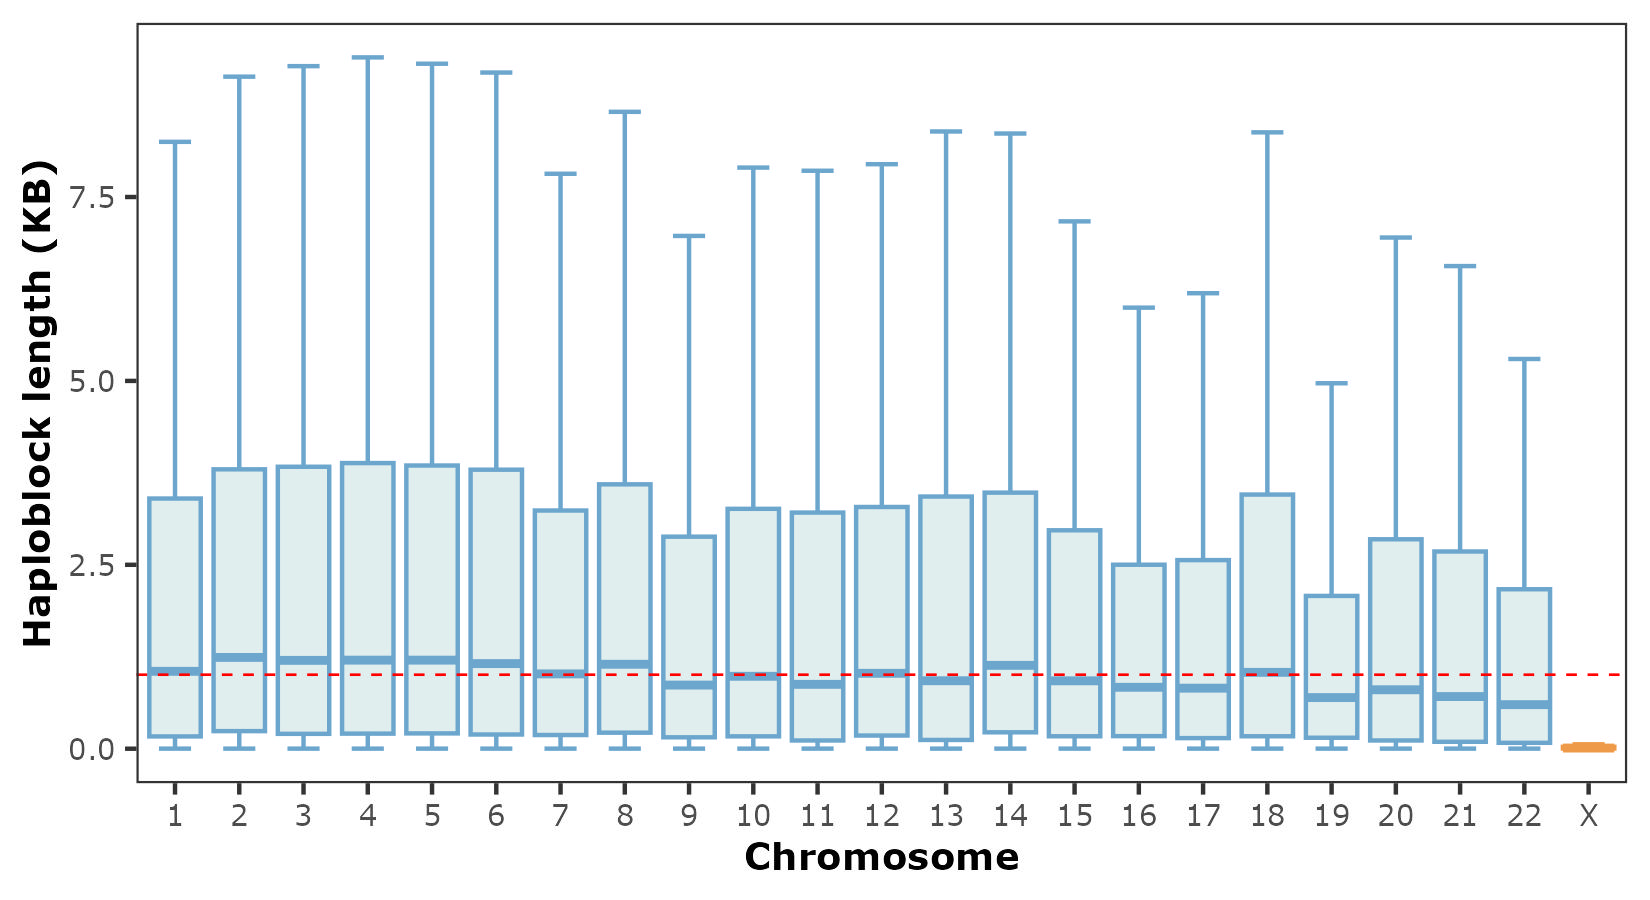

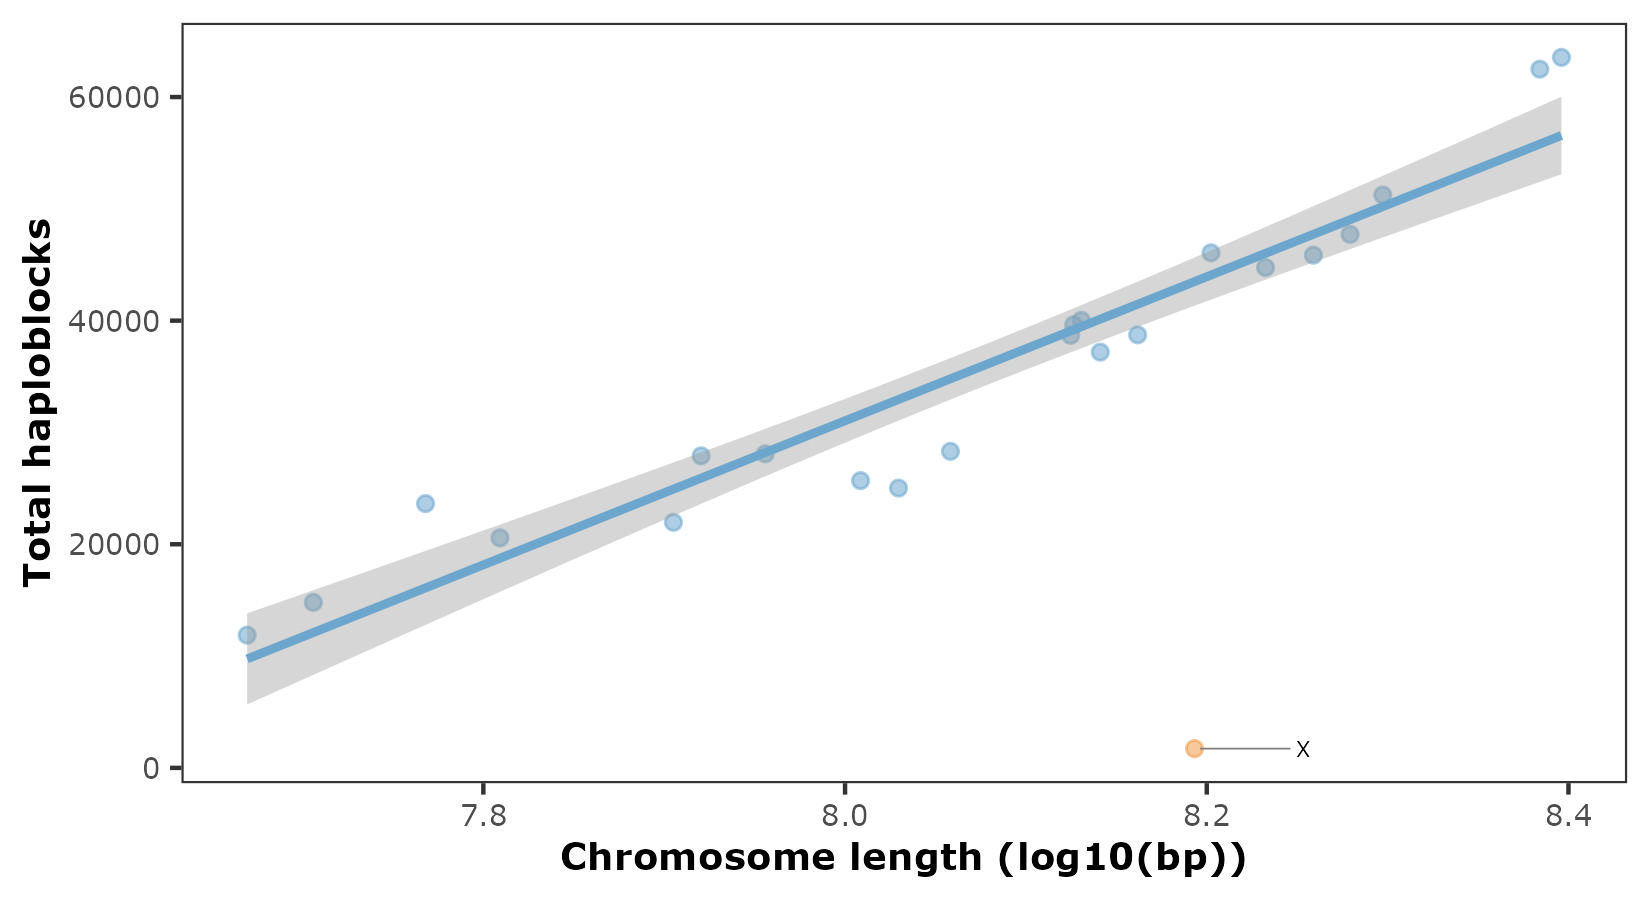

In [6]:
from IPython.display import display
from PIL import Image

plot="Est.Haplotypes_topmed/Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg"
display(Image.open(plot))

plot="Est.Haplotypes_topmed/Summary_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg"
display(Image.open(plot))


## ***NEW 08-31-2023:*** Estimate number of haplotype blocks on 1000G phase3 genomes (chr1-22,X)

download integrating calls for autosome estimation blocks from: `http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/`

In [ ]:
%%bash
mkdir Est.Haplotypes_1000G
cd Est.Haplotypes_1000G

wget http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/README_phase3_callset_20150220
wget http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel
wget http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20200731.ALL.ped

In [ ]:
%%bash
cd Est.Haplotypes_1000G

for CHNUM in {1..22}
do
wget http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr${CHNUM}.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
done

wget http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chrX.phase3_shapeit2_mvncall_integrated_v1c.20130502.genotypes.vcf.gz

In [ ]:
%%bash
cd Est.Haplotypes_1000G

## ran this interactively directly in the terminal ##

## create list of EUR samples to keep from 1000G (that is about 503 samples)
awk '{if($3 == "EUR") print}' integrated_call_samples_v3.20130502.ALL.panel | awk '{print $1,$1}' OFS=" " > SampleList.1000G_EURO.txt

## create subset of 1000G containing only EURO samples
module load plink/3.6-alpha

for CHNUM in {1..22}
do
plink2 \
--vcf ALL.chr${CHNUM}.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz \
--double-id \
--keep SampleList.1000G_EURO.txt \
--max-alleles 2 \
--make-bed \
--threads 32 \
--out 1000G_euro.chr${CHNUM}
done

plink2 \
--vcf ALL.chrX.phase3_shapeit2_mvncall_integrated_v1c.20130502.genotypes.vcf.gz \
--double-id \
--keep SampleList.1000G_EURO.txt \
--max-alleles 2 \
--make-bed \
--threads 32 \
--out 1000G_euro.chrX

### Run chrX-specific QC

only removed PAR region

In [ ]:
!cat ./scripts/QC_preimputation_v3_UNRELATED_wgs_chrX.sh

In [ ]:
%%bash
cd Est.Haplotypes_1000G

# update sex on .fam file - to allow gender check and to run chrX specific QC
head integrated_call_samples_v3.20130502.ALL.panel | column -t
cut -f4 integrated_call_samples_v3.20130502.ALL.panel | sort | uniq -c

# make sex update file
awk '{print $1,$1,$4}' integrated_call_samples_v3.20130502.ALL.panel | awk '{gsub("female","2",$3); print}' | awk '{gsub("male","1",$3); print}' | tail -n +2> SexUpdate.txt
awk '{print $3}' SexUpdate.txt | sort | uniq -c

In [ ]:
%%bash
cd Est.Haplotypes_1000G

module load plink/1.9.0-beta4.4

CHNUM="X"

plink \
--bfile 1000G_euro.chr${CHNUM} \
--update-sex SexUpdate.txt \
--make-bed \
--threads 32 \
--out 1000G_euro_sexUpdated.chrX

In [ ]:
%%bash
cd Est.Haplotypes_1000G
head 1000G_euro_sexUpdated.chrX.fam | column -t

In [ ]:
%%bash
cd Est.Haplotypes_1000G

module load plink/3.6-alpha

# Subset chr X to exclude PAR region
plink2 \
--bfile 1000G_euro.chrX \
--set-hh-missing \
--exclude range ../scripts/PAR_hg38_region.txt \
--keep-allele-order \
--make-bed \
--out 1000G_euro_noPAR.chrX

### Run haploblock estimation

In [ ]:
%%bash
cd Est.Haplotypes_1000G

#module load plink/1.9.0-beta4.4

for CHNUM in {1..22} X
do
echo "plink \
--bfile 1000G_euro.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 1000 \
--threads 32 \
--out 1000G_euro.maxblock1000kb_chr${CHNUM}" >> haplo.1000kb.swarm
done

swarm --file haplo.1000kb.swarm --logdir swarmOE -g 120 -t auto --time 04:00:00 --module plink/1.9.0-beta4.4 --sbatch '--constraint=ibfdr' --partition quick

In [ ]:
!jobhist 7379558 | grep "7379558_"

In [ ]:
%%bash
cd Est.Haplotypes_1000G

#module load plink/1.9.0-beta4.4

for CHNUM in {1..22} X
do
echo "plink \
--bfile 1000G_euro.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 200 \
--threads 32 \
--out 1000G_euro.maxblock200kb_chr${CHNUM}" >> haplo.200kb.swarm
done

swarm --file haplo.200kb.swarm --logdir swarmOE -g 120 -t auto --time 02:30:00 --module plink/1.9.0-beta4.4 --sbatch '--constraint=ibfdr' --partition quick

In [ ]:
!jobhist 7379559 | grep "7379559_"

In [ ]:
%%bash
cd Est.Haplotypes_1000G

module load plink/1.9.0-beta4.4

CHNUM="X"

plink \
--bfile 1000G_euro_noPAR.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 1000 \
--threads 32 \
--out 1000G_euro_noPAR.maxblock1000kb_chr${CHNUM}

plink \
--bfile 1000G_euro_noPAR.chr${CHNUM} \
--hwe 0.000001 midp \
--blocks-min-maf 0.01 \
--blocks no-pheno-req \
--blocks-max-kb 200 \
--threads 32 \
--out 1000G_euro_noPAR.maxblock200kb_chr${CHNUM}

In [7]:
%%bash
cd Est.Haplotypes_1000G
wc -l 1000G_euro.maxblock1000kb_chr*.blocks
wc -l 1000G_euro.maxblock200kb_chr*.blocks

wc -l 1000G_euro_noPAR.maxblock1000kb_chr*.blocks
wc -l 1000G_euro_noPAR.maxblock200kb_chr*.blocks

   44334 1000G_euro.maxblock1000kb_chr1.blocks
   28162 1000G_euro.maxblock1000kb_chr10.blocks
   26409 1000G_euro.maxblock1000kb_chr11.blocks
   28166 1000G_euro.maxblock1000kb_chr12.blocks
   19917 1000G_euro.maxblock1000kb_chr13.blocks
   19549 1000G_euro.maxblock1000kb_chr14.blocks
   18277 1000G_euro.maxblock1000kb_chr15.blocks
   20688 1000G_euro.maxblock1000kb_chr16.blocks
   17851 1000G_euro.maxblock1000kb_chr17.blocks
   16288 1000G_euro.maxblock1000kb_chr18.blocks
   15757 1000G_euro.maxblock1000kb_chr19.blocks
   47574 1000G_euro.maxblock1000kb_chr2.blocks
   13187 1000G_euro.maxblock1000kb_chr20.blocks
    8100 1000G_euro.maxblock1000kb_chr21.blocks
    9894 1000G_euro.maxblock1000kb_chr22.blocks
   37545 1000G_euro.maxblock1000kb_chr3.blocks
   35444 1000G_euro.maxblock1000kb_chr4.blocks
   33885 1000G_euro.maxblock1000kb_chr5.blocks
   34013 1000G_euro.maxblock1000kb_chr6.blocks
   33078 1000G_euro.maxblock1000kb_chr7.blocks
   29718 1000G_euro.maxblock1000kb_chr8.blocks


### Plot summary comparing blocks between chromosome X and autosomes from the 1000G cohort

In [ ]:
%%bash
cd Est.Haplotypes_1000G

# first concatenate the file from autosomes
head -n 1 1000G_euro.maxblock1000kb_chr1.blocks.det > 1000G_euro.maxblock1000kb_ALLautosomes.blocks.det
for CHNUM in {1..22}
do
tail -n +2 1000G_euro.maxblock1000kb_chr${CHNUM}.blocks.det >> 1000G_euro.maxblock1000kb_ALLautosomes.blocks.det
done


In [ ]:
%%bash
cd Est.Haplotypes_1000G

# make summary plots of number of variants per block and length per block

module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library(ggrepel)

xchrom <- fread("1000G_euro_noPAR.maxblock1000kb_chrX.blocks.det")
autosomes <- fread("1000G_euro.maxblock1000kb_ALLautosomes.blocks.det")
dim(xchrom)
dim(autosomes)

blocks <- rbind(xchrom,autosomes)
blocks <- blocks %>% arrange(CHR)
dim(blocks)
head(blocks)

chrom_len <- fread("../chrom_lengths.txt")
chrom_len$`Total_length_(bp)` <- gsub(",","",chrom_len$`Total_length_(bp)`)
chrom_len$`Total_length_(bp)` <- as.integer(chrom_len$`Total_length_(bp)`)

# bin groups by NSNPS (every 10 snps)
blocks$Interval_group_num <- findInterval(blocks$NSNPS, seq(25,3000,25))

## give name of upperbound of max NSNPS for each bin
Interval_group_name <- seq(25,3000,25)
Interval_group_num <- seq(1:length(Interval_group_name)[1]+1) - 1
map <- cbind(Interval_group_num,Interval_group_name) %>% data.frame()

## get interval_group_name
blocks_updated <- merge(blocks, map, by="Interval_group_num", all.x=T)
blocks_updated$CHR <- gsub("23","X",blocks_updated$CHR)
blocks_updated$CHR <- factor(blocks_updated$CHR, levels=c(1:22,"X"))
blocks_updated$chr_type <- ifelse(blocks_updated$CHR == "X", "X", "Autosomes")
blocks_updated$chr_type <- factor(blocks_updated$chr_type, levels = c("Autosomes","X"))
blocks_updated$Interval_group_name <- factor(blocks_updated$Interval_group_name)

## calculate NSNPS per block
blocks_updated$NSNPS_per_kb_block <- blocks_updated$NSNPS/blocks_updated$KB

## save out compiled blocks results
blocks_updated$Cohort <- "1000G_Euro"
write.table(blocks_updated, "Merged_1000G_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# summarize blocks
summstats <- blocks_updated %>%
             group_by(CHR) %>%
             summarize(total_blocks = n(),
                       shortest_length_kb = min(KB),
                       longest_length_kb = max(KB),
                       mean_length_kb = mean(KB),
                       sd_length_kb = sd(KB),
                       mean_nsnps = mean(NSNPS),
                       sd_nsnps = sd(NSNPS),
                       total_nsnps = sum(NSNPS),
                       mean_nsnps_per_KB_block = mean(NSNPS_per_kb_block),
                       sd_nsnps_per_KB_block = sd(NSNPS_per_kb_block)) %>%
             mutate(Cohort = "1000G_Euro") %>%
             data.frame()
summstats$CHR <- factor(summstats$CHR, levels=c(1:22,"X"))
summstats_final <- merge(summstats, chrom_len, by.x="CHR",by.y="Chromosome",all.x=T)
summstats_final$N_blocks_per_chrom_len <- summstats_final$total_blocks / summstats_final$`Total_length_(bp)`
summstats_final$chr_type <- ifelse(summstats_final$CHR == "X", "X", "Autosomes")
summstats_final$chr_type <- factor(summstats_final$chr_type, levels = c("Autosomes","X"))
write.table(summstats, "Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# plot summary
plot <- ggplot(blocks_updated, aes(KB,color= CHR)) + geom_histogram(fill="white", alpha=0.5, position="identity", bins=30) + facet_wrap( ~ CHR, ncol=6)
ggsave("Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_histogram.jpeg", plot, height=5, width=10)


# get median length of blocks for autosomes and X
median_block_length <- median(blocks_updated$KB)
median_block_length

# get median nsnps per kb block length for autosomes and X
median_nsnps_block_length <- median(blocks_updated$NSNPS_per_kb_block)
median_nsnps_block_length

# get upper IQR
library(plyr)
chrom_x = subset(blocks_updated, blocks_updated$CHR == "X")
upper_Q = summary(chrom_x$KB)[5]
IQR = summary(chrom_x$KB)[5] - summary(chrom_x$KB)[2]
outlier_fence = upper_Q + 1.5*IQR
y_max = round_any(outlier_fence[[1]], 10, f=ceiling)
detach(package:plyr,unload=TRUE)

#remotes::install_github('rpkgs/gg.layers')
library(gg.layers)
library(ggplot2)

outlier.colour = NA

plot1 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=KB, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("Haploblock length (KB)") +
        xlab("Chromosome") +
        geom_hline(yintercept=median_block_length, linetype="dashed", color = "red", linewidth = 0.3) +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
        
ggsave("Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg", plot1, height=3, width=5.5)

plot2 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=NSNPS_per_kb_block, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("No. SNPS/haploblock length (KB)") +
        xlab("Chromosome") +
        geom_hline(yintercept=median_nsnps_block_length, linetype="dashed", color = "red", linewidth = 0.3) +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_nsnps_per_blockLength.jpeg", plot2, height=3, width=5.5)

plot3 <- ggplot(blocks_updated) +
        geom_point(aes(x=KB,y=NSNPS, color=chr_type, alpha=0.5), show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Haploblock length (KB)") +
        xlab("No. SNPS") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength_vs_nsnps.jpeg", plot3, height=3, width=5.5)

plot4 <- ggplot(summstats_final) +
        geom_point(aes(x=log10(`Total_length_(bp)`),y=total_blocks, color=chr_type, alpha=0.5), show.legend = FALSE) +
        geom_smooth(data = subset(summstats_final, summstats_final$chr_type == "Autosomes"), aes(x=log10(`Total_length_(bp)`),y=total_blocks, color=chr_type),
                    method = lm, formula = 'y ~ x', show.legend = FALSE) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Total haploblocks") +
        xlab("Chromosome length (log10(bp))") +
        geom_label_repel(data = subset(summstats_final, summstats_final$chr_type == "X"),
                         aes(x=log10(`Total_length_(bp)`),y=total_blocks,label=CHR),
                         size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1,
                         fill = "NA", label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg", plot4, height=3, width=5.5)

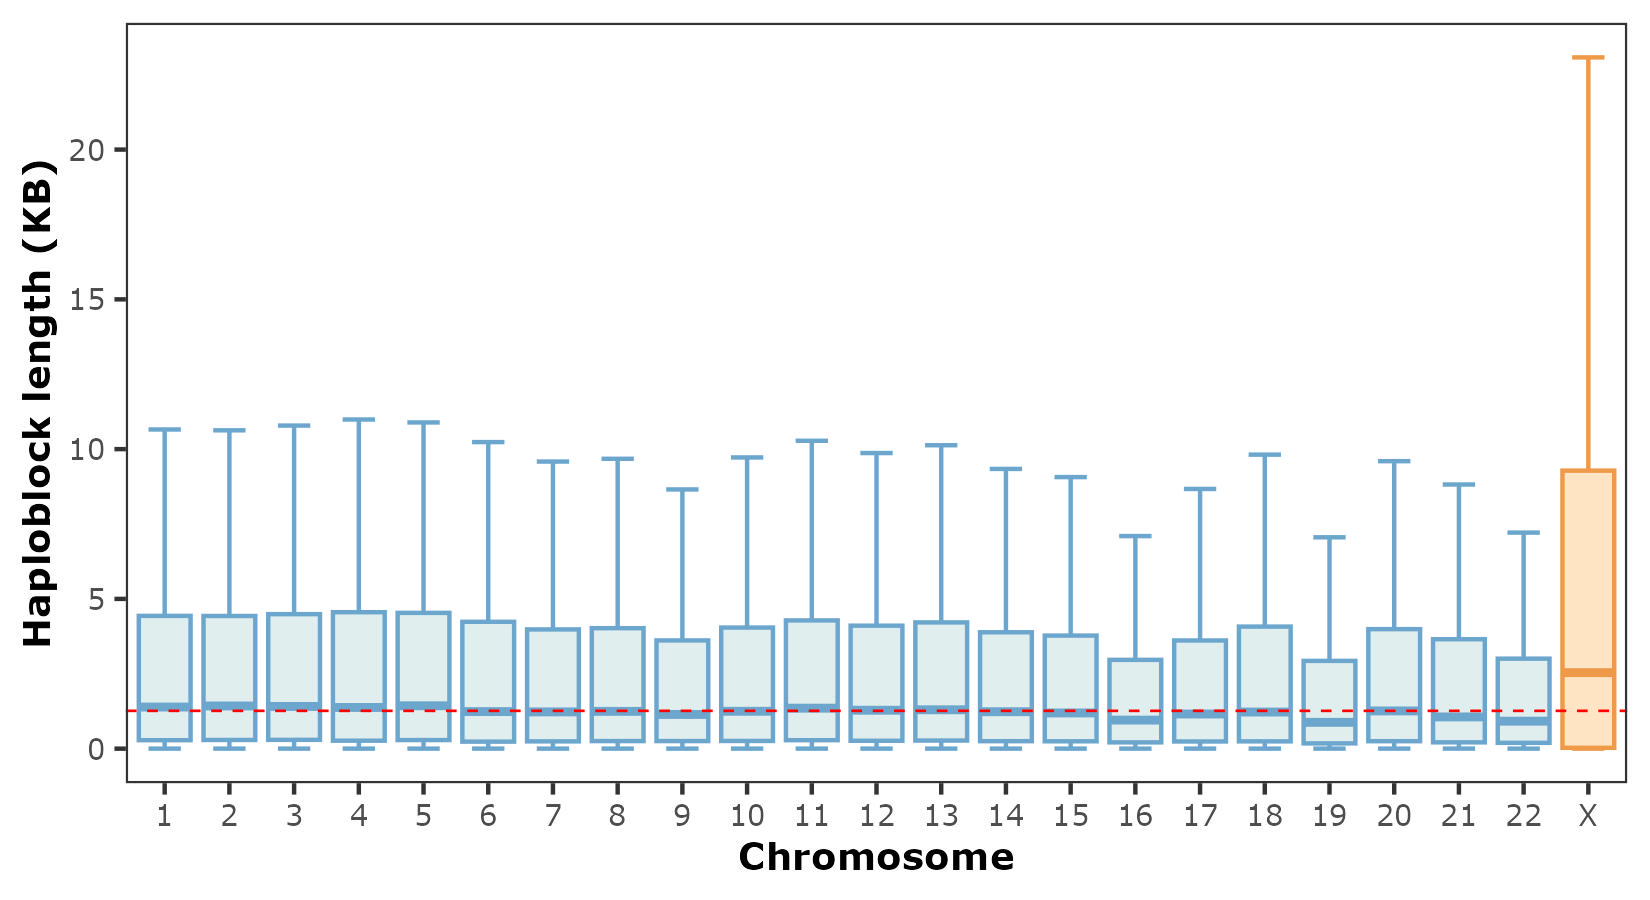

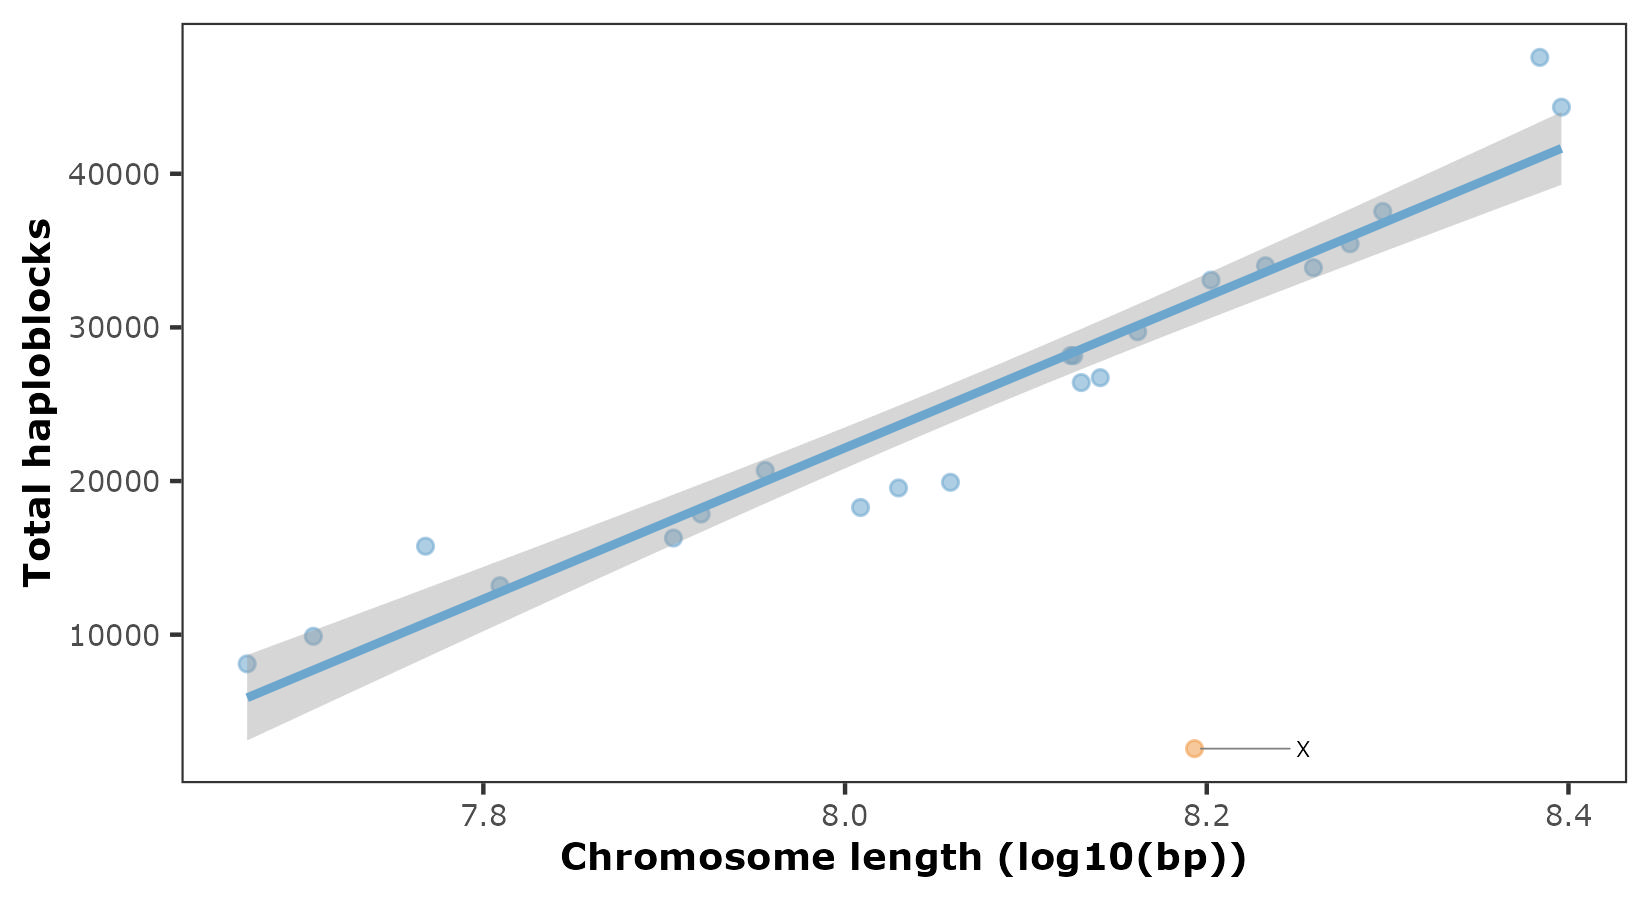

In [8]:
from IPython.display import display
from PIL import Image

plot="Est.Haplotypes_1000G/Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg"
display(Image.open(plot))

plot="Est.Haplotypes_1000G/Summary_1000G_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg"
display(Image.open(plot))


## ***NEW 09-02-2023:*** Create master summary plot for haplotype estimation across LBD cases/control vs 1000G-euro and topmed-euro

In [ ]:
%%bash
module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library("ggrepel")


In [ ]:
%%bash

# make summary plots of number of variants per block and length per block

module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library("ggrepel")
library(gg.layers)
library(ggplot2)


LBD <- fread("Est.Haplotypes_autosomes/Merged_LBDcohort_LDblocks.maxblock1000kb_chrX_autosomes.txt")
topmed <- fread("Est.Haplotypes_topmed/Merged_topmed_LDblocks.maxblock1000kb_chrX_autosomes.txt")
g1000 <- fread("Est.Haplotypes_1000G/Merged_1000G_LDblocks.maxblock1000kb_chrX_autosomes.txt")

blocks_updated <- rbind(LBD,g1000,topmed)
dim(blocks_updated)
head(blocks_updated)

## save out compiled blocks results
write.table(blocks_updated, "Compiled_LBDcohort_1000G_topmed_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# set factor for Cohort
blocks_updated$Cohort <- gsub("LBD_case_control", "LBD (this study)", blocks_updated$Cohort)
blocks_updated$Cohort <- gsub("1000G_Euro", "1000G (European)", blocks_updated$Cohort)
blocks_updated$Cohort <- gsub("TOPMed_Euro_6K", "TOPMed (European)", blocks_updated$Cohort)
blocks_updated$Cohort <- factor(blocks_updated$Cohort, levels=c("LBD (this study)", "1000G (European)", "TOPMed (European)"))
blocks_updated$CHR <- factor(blocks_updated$CHR, levels=c(1:22,"X"))

# read in chrom length file
chrom_len <- fread("chrom_lengths.txt")
chrom_len$`Total_length_(bp)` <- gsub(",","",chrom_len$`Total_length_(bp)`)
chrom_len$`Total_length_(bp)` <- as.integer(chrom_len$`Total_length_(bp)`)

# get some counts
table(blocks_updated$Cohort)
table(blocks_updated$CHR,blocks_updated$Cohort)

# summarize blocks
summstats <- blocks_updated %>%
             group_by(Cohort,CHR) %>%
             summarize(total_blocks = n(),
                       shortest_length_kb = min(KB),
                       longest_length_kb = max(KB),
                       mean_length_kb = mean(KB),
                       sd_length_kb = sd(KB),
                       mean_nsnps = mean(NSNPS),
                       sd_nsnps = sd(NSNPS),
                       total_nsnps = sum(NSNPS),
                       mean_nsnps_per_KB_block = mean(NSNPS_per_kb_block),
                       sd_nsnps_per_KB_block = sd(NSNPS_per_kb_block)) %>%
             data.frame()
summstats$CHR <- factor(summstats$CHR, levels=c(1:22,"X"))
summstats_final <- merge(summstats, chrom_len, by.x="CHR",by.y="Chromosome",all.x=T)
summstats_final$N_blocks_per_chrom_len <- summstats_final$total_blocks / summstats_final$`Total_length_(bp)`
summstats_final$chr_type <- ifelse(summstats_final$CHR == "X", "X", "Autosomes")
summstats_final$chr_type <- factor(summstats_final$chr_type, levels = c("Autosomes","X"))
summstats_final
write.table(summstats_final, "Summary_Compiled_LBDcohort_1000G_topmed_LDblocks.maxblock1000kb_chrX_autosomes.txt",sep="\t",quote=F,row.names=F,col.names=T)

# plot summary
plot1 <- ggplot(blocks_updated) +
        geom_boxplot2(aes(x=CHR,y=KB, color=chr_type, fill=chr_type), width = 0.8, width.errorbar = 0.5, show.legend = FALSE) +
        facet_grid(rows = vars(Cohort)) + 
        scale_color_manual(values=c("skyblue3", "tan2")) +
        scale_fill_manual(values=c("azure2", "bisque1")) +
        ylab("Haploblock length (KB)") +
        xlab("Chromosome") +
        ggtitle("Summary of haploblock length per chromosome") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
        
ggsave("Summary_Compiled_LBDcohort_1000G_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg", plot1, height=6.5, width=5)


plot4 <- ggplot(summstats_final) +
        geom_point(aes(x=`Total_length_(bp)`/1000000,y=total_blocks, color=chr_type, alpha=0.5), show.legend = FALSE) +
        geom_smooth(data = subset(summstats_final, summstats_final$chr_type == "Autosomes"),
                    aes(x=`Total_length_(bp)`/1000000,y=total_blocks, color=chr_type),
                    method = lm, formula = 'y ~ x', show.legend = FALSE) +
        facet_grid(rows = vars(Cohort)) +
        scale_color_manual(values=c("skyblue3", "tan2")) +
        ylab("Total haploblocks") +
        xlab("Chromosome length (Mbp))") +
        ggtitle("Summary of total number of haploblocks per chromosome vs chromosome length") +
        geom_label_repel(data = subset(summstats_final, summstats_final$chr_type == "X"),
                         aes(x=`Total_length_(bp)`/1000000,y=total_blocks,label=CHR),
                         size=3.5, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1,
                         fill = "NA", label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
        theme(legend.position = "none") +
        theme_bw() +
        theme(axis.text=element_text(size=7),
              axis.title=element_text(size=9,face="bold"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
ggsave("Summary_Compiled_LBDcohort_1000G_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg", plot4, height=6.5, width=3)

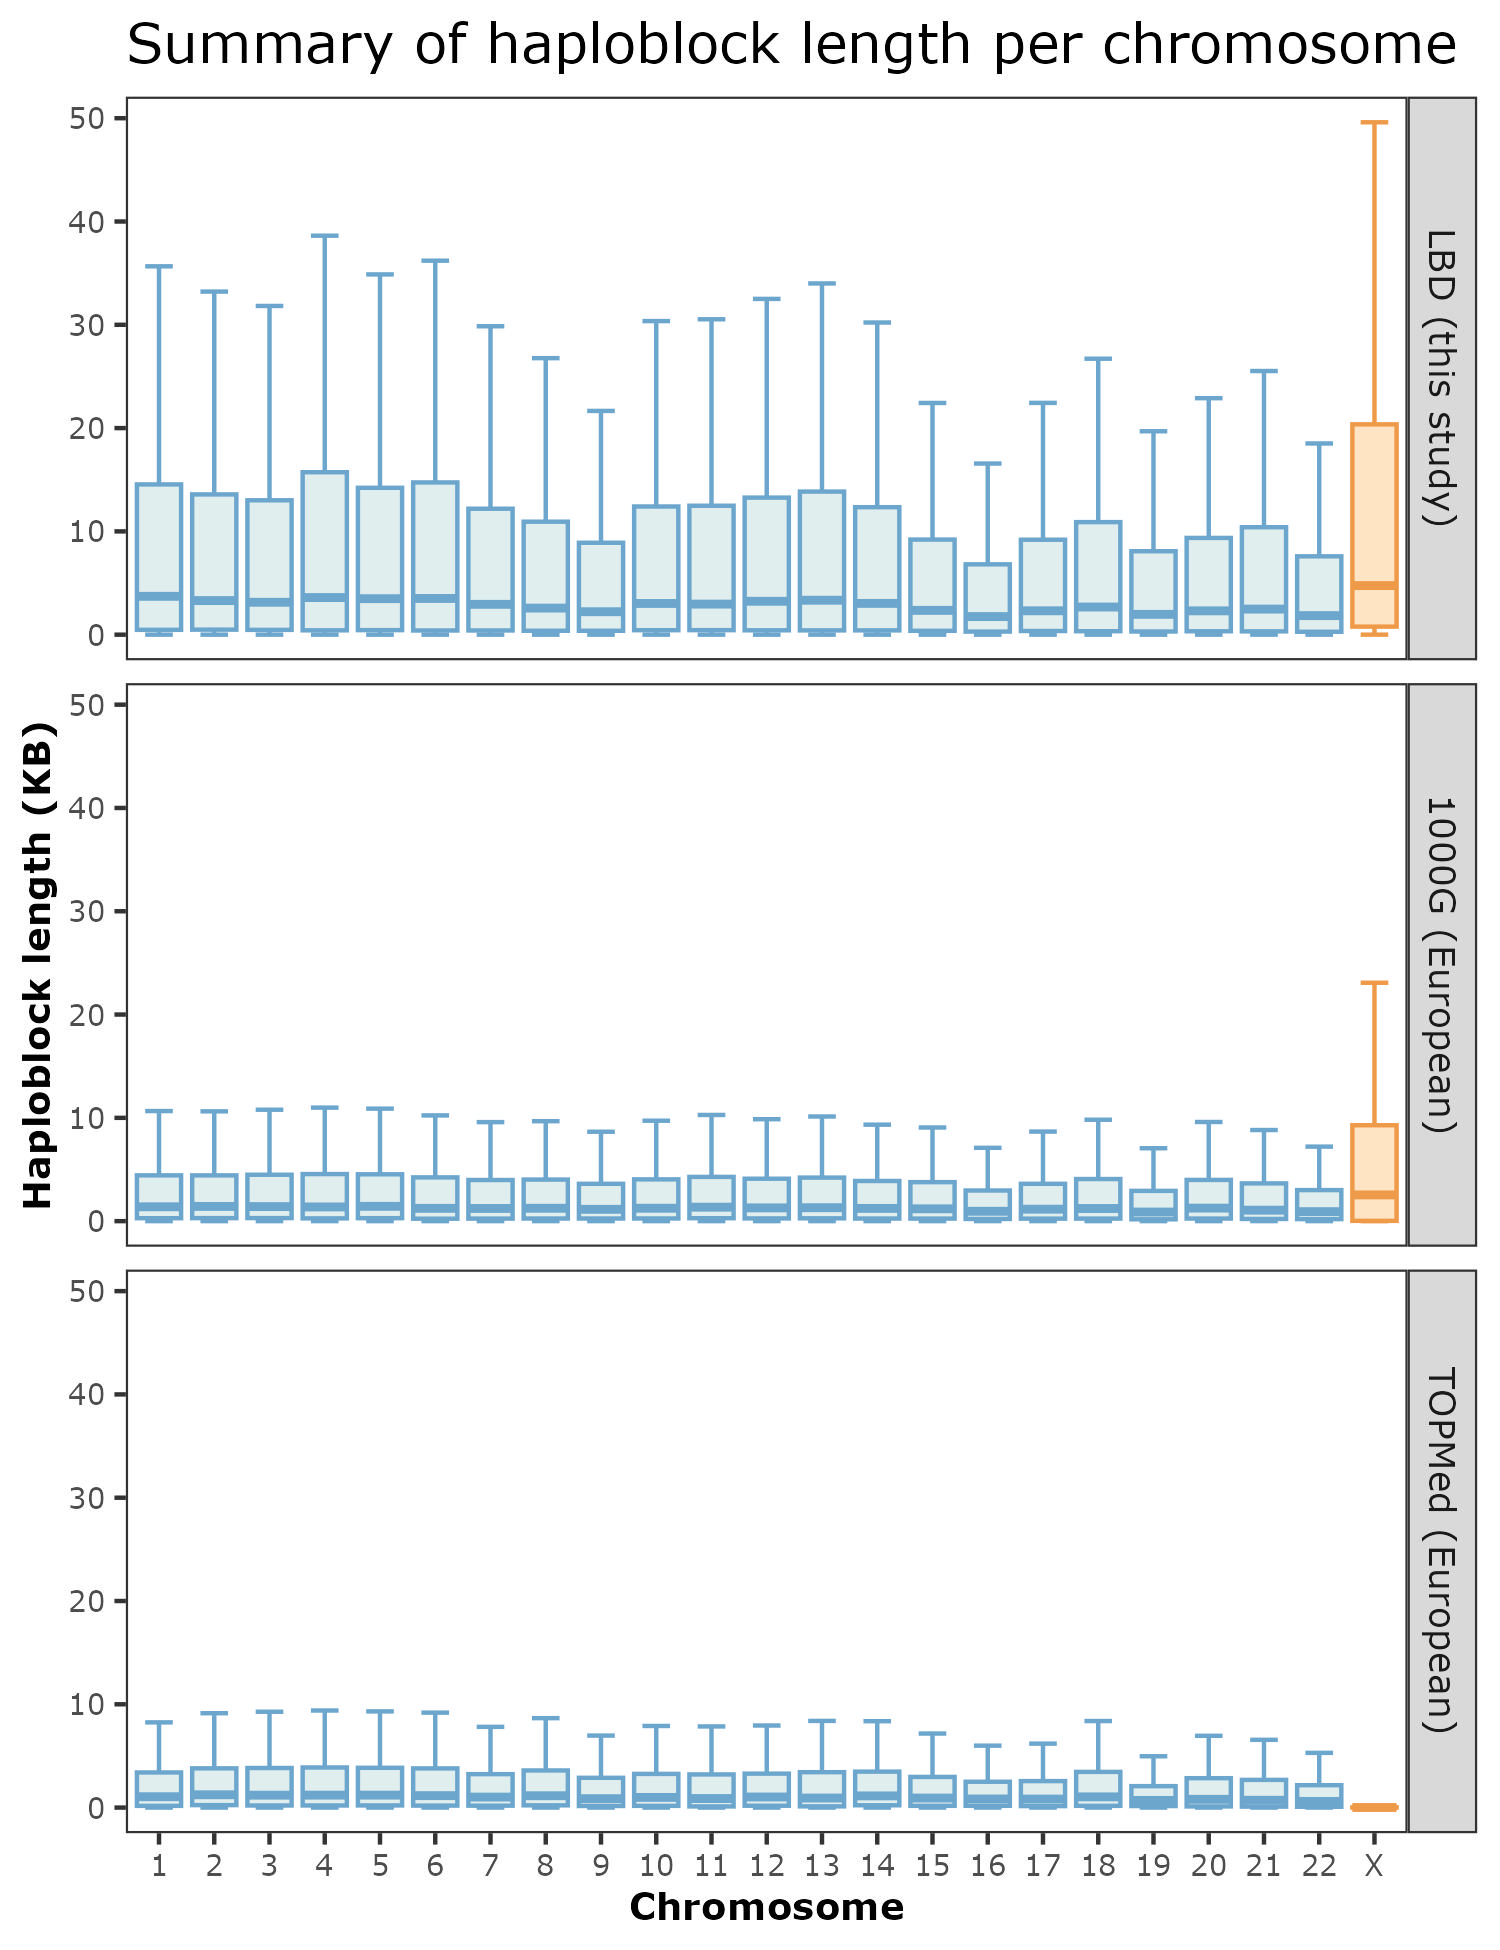

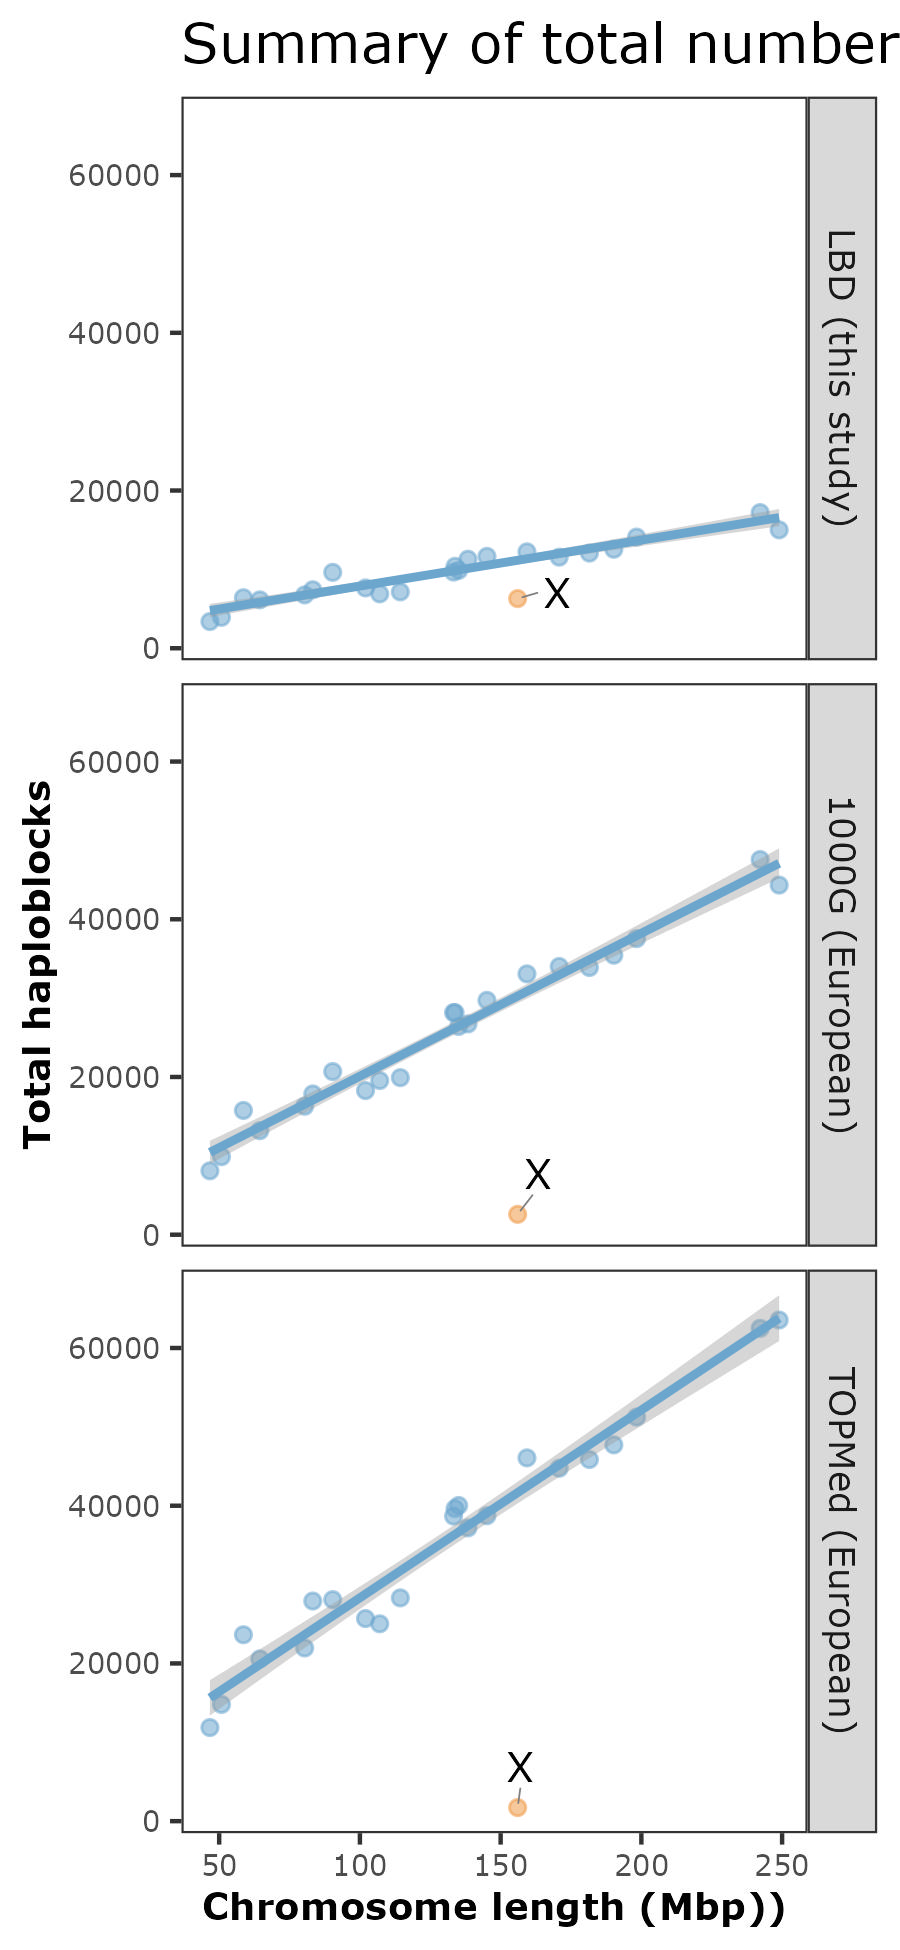

In [9]:
from IPython.display import display
from PIL import Image

plot="Summary_Compiled_LBDcohort_1000G_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_blockLength.jpeg"
display(Image.open(plot))

plot="Summary_Compiled_LBDcohort_1000G_topmed_LDblocks.maxblock1000kb_chrX_autosomes_boxplot_chromlength_vs_nblocks.jpeg"
display(Image.open(plot))


In [10]:
0.05/6296

7.941550190597204e-06

## ***UPDATED 12-07-2023:*** Calculate X-PCA

In [ ]:
!mkdir X-PCA_redo

In [ ]:
!mkdir X-PCA_redo/females_only
!mkdir X-PCA_redo/males_only
!mkdir X-PCA_redo/both

### both

In [ ]:
%%bash
cd X-PCA_redo

module load plink/1.9.0-beta4.4
module load R/4.3
module load GCTA/1.94.1
module load flashpca/2.0

# Prune snps --> merge to a single file
module load plink/3.6-alpha
plink2 \
--bfile /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--remove-nosex \
--maf 0.01 \
--geno 0.01 \
--hwe 5e-6 \
--make-bed \
--out both/temp_chrX \
--memory 119500 --threads 19

plink2 \
--bfile both/temp_chrX \
--remove-nosex \
--geno 0.01 \
--maf 0.05 \
--indep-pairwise 1000 10 0.02 \
--out both/temp_pruning_chrX \
--memory 119500 --threads 19

plink2 \
--bfile both/temp_chrX \
--remove-nosex \
--extract both/temp_pruning_chrX.prune.in \
--keep-allele-order \
--make-bed \
--out both/pruned_chrX \
--memory 119500 --threads 19

# Calculate/generate PCs based on pruned data set
cd both
flashpca --bfile pruned_chrX --suffix _pruned_chrX_forPCA --numthreads 19

# Move all log files to a new folder
mkdir logFiles
mv *.log logFiles

# Remove intermediate files
rm temp_*

### females_only

In [ ]:
%%bash
cd X-PCA_redo

module load plink/1.9.0-beta4.4
module load R/4.3
module load GCTA/1.94.1
module load flashpca/2.0

# Prune snps --> merge to a single file
module load plink/3.6-alpha
plink2 \
--bfile /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--remove-nosex \
--maf 0.01 \
--geno 0.01 \
--hwe 5e-6 \
--make-bed \
--keep-females \
--out females_only/temp_chrX \
--memory 119500 --threads 19

plink2 \
--bfile females_only/temp_chrX \
--remove-nosex \
--geno 0.01 \
--maf 0.05 \
--indep-pairwise 1000 10 0.02 \
--keep-females \
--out females_only/temp_pruning_chrX \
--memory 119500 --threads 19

plink2 \
--bfile females_only/temp_chrX \
--remove-nosex \
--extract females_only/temp_pruning_chrX.prune.in \
--keep-allele-order \
--make-bed \
--keep-females \
--out females_only/pruned_chrX \
--memory 119500 --threads 19

# Calculate/generate PCs based on pruned data set
cd females_only
flashpca --bfile pruned_chrX --suffix _pruned_chrX_forPCA --numthreads 19

# Move all log files to a new folder
mkdir logFiles
mv *.log logFiles

# Remove intermediate files
rm temp_*

### males_only

In [ ]:
%%bash
cd X-PCA_redo

module load plink/1.9.0-beta4.4
module load R/4.3
module load GCTA/1.94.1
module load flashpca/2.0

# Prune snps --> merge to a single file
module load plink/3.6-alpha
plink2 \
--bfile /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--remove-nosex \
--maf 0.01 \
--geno 0.01 \
--hwe 5e-6 \
--make-bed \
--keep-males \
--out males_only/temp_chrX \
--memory 119500 --threads 19

plink2 \
--bfile males_only/temp_chrX \
--remove-nosex \
--geno 0.01 \
--maf 0.05 \
--indep-pairwise 1000 10 0.02 \
--keep-males \
--out males_only/temp_pruning_chrX \
--memory 119500 --threads 19

plink2 \
--bfile males_only/temp_chrX \
--remove-nosex \
--extract males_only/temp_pruning_chrX.prune.in \
--keep-allele-order \
--make-bed \
--keep-males \
--out males_only/pruned_chrX \
--memory 119500 --threads 19

# Calculate/generate PCs based on pruned data set
cd males_only
flashpca --bfile pruned_chrX --suffix _pruned_chrX_forPCA --numthreads 19

# Move all log files to a new folder
mkdir logFiles
mv *.log logFiles

# Remove intermediate files
rm temp_*

## ***UPDATED 12-07-2023:*** Calculate sex-stratified autosomal-PCA

In [ ]:
!mkdir Autosomal-PCA/
!mkdir Autosomal-PCA/females_only
!mkdir Autosomal-PCA/males_only
!mkdir Autosomal-PCA/both

### both

In [ ]:
%%bash
cd Autosomal-PCA/

module load plink/1.9.0-beta4.4
module load R/4.3
module load GCTA/1.94.1
module load flashpca/2.0

DATA="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020"

# Prune snps --> merge to a single file
module load plink/3.6-alpha

for CHNUM in {1..22};
do
plink2 \
--pfile $DATA/LBD/CLEAN.UNRELATED/FILTERED.LBD.controls.UNRELATED_chr${CHNUM} \
--extract $DATA/SNV.Variant.List/preQC.SNV.Varlist.neurod.freeze9.LBD.FTD.ALLcontrols4K.chr${CHNUM}.txt \
--remove-nosex \
--maf 0.01 \
--geno 0.01 \
--hwe 5e-6 \
--autosome \
--exclude range /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.GLM/GLM.LBD.4Kcontrols/scripts/GenomicRangeExlusion.forPCA.txt \
--make-bed \
--out both/temp_chr${CHNUM} \
--memory 119500 --threads 19;

plink2 \
--bfile both/temp_chr${CHNUM} \
--remove-nosex \
--geno 0.01 \
--maf 0.05 \
--indep-pairwise 1000 10 0.02 \
--out both/temp_pruning_chr${CHNUM} \
--memory 119500 --threads 19;

plink2 \
--bfile both/temp_chr${CHNUM} \
--remove-nosex \
--extract both/temp_pruning_chr${CHNUM}.prune.in \
--keep-allele-order \
--make-bed \
--out both/pruned_chr${CHNUM} \
--memory 119500 --threads 19;

done

# Merge pruned binaries to single file with chr 1-22
cat both/pruned_chr1.fam > both/pruned_ALLchr_forPCA.fam
for chr in {1..22}; do cat both/pruned_chr${chr}.bim; done > both/pruned_ALLchr_forPCA.bim
(echo -en "\x6C\x1B\x01"; for chr in {1..22}; do tail -c +4 both/pruned_chr${chr}.bed; done) > both/pruned_ALLchr_forPCA.bed

# Calculate/generate PCs based on pruned data set
cd both
flashpca --bfile pruned_ALLchr_forPCA --suffix _FILTERED_ALLchr_forPCA --numthreads 19

# Move all log files to a new folder
mkdir logFiles
mv *.log logFiles

# Remove intermediate files
rm temp_*
rm pruned_chr*.*

### females_only

In [ ]:
%%bash
cd Autosomal-PCA/

module load plink/1.9.0-beta4.4
module load R/4.3
module load GCTA/1.94.1
module load flashpca/2.0

DATA="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020"

# Prune snps --> merge to a single file
module load plink/3.6-alpha

for CHNUM in {1..22};
do
plink2 \
--pfile $DATA/LBD/CLEAN.UNRELATED/FILTERED.LBD.controls.UNRELATED_chr${CHNUM} \
--extract $DATA/SNV.Variant.List/preQC.SNV.Varlist.neurod.freeze9.LBD.FTD.ALLcontrols4K.chr${CHNUM}.txt \
--remove-nosex \
--maf 0.01 \
--geno 0.01 \
--hwe 5e-6 \
--autosome \
--exclude range /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.GLM/GLM.LBD.4Kcontrols/scripts/GenomicRangeExlusion.forPCA.txt \
--make-bed \
--keep-females \
--out females_only/temp_chr${CHNUM} \
--memory 119500 --threads 19;

plink2 \
--bfile females_only/temp_chr${CHNUM} \
--remove-nosex \
--geno 0.01 \
--maf 0.05 \
--indep-pairwise 1000 10 0.02 \
--keep-females \
--out females_only/temp_pruning_chr${CHNUM} \
--memory 119500 --threads 19;

plink2 \
--bfile females_only/temp_chr${CHNUM} \
--remove-nosex \
--extract females_only/temp_pruning_chr${CHNUM}.prune.in \
--keep-allele-order \
--make-bed \
--keep-females \
--out females_only/pruned_chr${CHNUM} \
--memory 119500 --threads 19;

done

# Merge pruned binaries to single file with chr 1-22
cat females_only/pruned_chr1.fam > females_only/pruned_ALLchr_forPCA.fam
for chr in {1..22}; do cat females_only/pruned_chr${chr}.bim; done > females_only/pruned_ALLchr_forPCA.bim
(echo -en "\x6C\x1B\x01"; for chr in {1..22}; do tail -c +4 females_only/pruned_chr${chr}.bed; done) > females_only/pruned_ALLchr_forPCA.bed

# Calculate/generate PCs based on pruned data set
cd females_only
flashpca --bfile pruned_ALLchr_forPCA --suffix _FILTERED_ALLchr_forPCA --numthreads 19

# Move all log files to a new folder
mkdir logFiles
mv *.log logFiles

# Remove intermediate files
rm temp_*
rm pruned_chr*.*

### males_only

In [ ]:
%%bash
cd Autosomal-PCA/

module load plink/1.9.0-beta4.4
module load R/4.3
module load GCTA/1.94.1
module load flashpca/2.0

DATA="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020"

# Prune snps --> merge to a single file
module load plink/3.6-alpha

for CHNUM in {1..22};
do
plink2 \
--pfile $DATA/LBD/CLEAN.UNRELATED/FILTERED.LBD.controls.UNRELATED_chr${CHNUM} \
--extract $DATA/SNV.Variant.List/preQC.SNV.Varlist.neurod.freeze9.LBD.FTD.ALLcontrols4K.chr${CHNUM}.txt \
--remove-nosex \
--maf 0.01 \
--geno 0.01 \
--hwe 5e-6 \
--autosome \
--exclude range /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.GLM/GLM.LBD.4Kcontrols/scripts/GenomicRangeExlusion.forPCA.txt \
--make-bed \
--keep-males \
--out males_only/temp_chr${CHNUM} \
--memory 119500 --threads 19;

plink2 \
--bfile males_only/temp_chr${CHNUM} \
--remove-nosex \
--geno 0.01 \
--maf 0.05 \
--indep-pairwise 1000 10 0.02 \
--keep-males \
--out males_only/temp_pruning_chr${CHNUM} \
--memory 119500 --threads 19;

plink2 \
--bfile males_only/temp_chr${CHNUM} \
--remove-nosex \
--extract males_only/temp_pruning_chr${CHNUM}.prune.in \
--keep-allele-order \
--make-bed \
--keep-males \
--out males_only/pruned_chr${CHNUM} \
--memory 119500 --threads 19;

done

# Merge pruned binaries to single file with chr 1-22
cat males_only/pruned_chr1.fam > males_only/pruned_ALLchr_forPCA.fam
for chr in {1..22}; do cat males_only/pruned_chr${chr}.bim; done > males_only/pruned_ALLchr_forPCA.bim
(echo -en "\x6C\x1B\x01"; for chr in {1..22}; do tail -c +4 males_only/pruned_chr${chr}.bed; done) > males_only/pruned_ALLchr_forPCA.bed

# Calculate/generate PCs based on pruned data set
cd males_only
flashpca --bfile pruned_ALLchr_forPCA --suffix _FILTERED_ALLchr_forPCA --numthreads 19

# Move all log files to a new folder
mkdir logFiles
mv *.log logFiles

# Remove intermediate files
rm temp_*
rm pruned_chr*.*

## ***UPDATED 12-08-2023:*** Calculate merged X-PCA and sex-stratified autosomal-PCA

Path of QC-ed pruned plink files: 
- autosomal chromosomes: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/Autosomal-PCA/both/pruned_ALLchr_forPCA.bed.bim/fam`
- X chromosome: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X-PCA_redo/both/pruned_chrX.bed/bim/fam`

To do:
- merge pruned autosomal with chrX plink files
- run flashPCA to get the combined genetic PC

In [ ]:
!mkdir X_autosomal-PCA

In [ ]:
!mkdir X_autosomal-PCA/both
!mkdir X_autosomal-PCA/females_only
!mkdir X_autosomal-PCA/males_only

In [ ]:
!cp /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/Autosomal-PCA/both/pruned_ALLchr_forPCA.* X_autosomal-PCA/both
!cp /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/Autosomal-PCA/females_only/pruned_ALLchr_forPCA.* X_autosomal-PCA/females_only
!cp /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/Autosomal-PCA/males_only/pruned_ALLchr_forPCA.* X_autosomal-PCA/males_only

!cp /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X-PCA_redo/both/pruned_chrX.* X_autosomal-PCA/both
!cp /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X-PCA_redo/females_only/pruned_chrX.* X_autosomal-PCA/females_only
!cp /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X-PCA_redo/males_only/pruned_chrX.* X_autosomal-PCA/males_only


### both

In [ ]:
%%bash
cd X_autosomal-PCA/
module load flashpca/2.0

DATA="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X_autosomal-PCA"

# Merge pruned binaries to single file
cat ${DATA}/both/pruned_ALLchr_forPCA.fam > both/pruned_ALLchr_X_forPCA.fam
for chr in {ALLchr_forPCA,chrX}; do cat both/pruned_${chr}.bim; done > both/pruned_ALLchr_X_forPCA.bim
(echo -en "\x6C\x1B\x01"; for chr in {ALLchr_forPCA,chrX}; do tail -c +4 both/pruned_${chr}.bed; done) > both/pruned_ALLchr_X_forPCA.bed

# Calculate/generate PCs based on pruned data set
cd both
flashpca --bfile pruned_ALLchr_X_forPCA --suffix _FILTERED_ALLchr_X_forPCA --numthreads 19

In [63]:
!wc -l X_autosomal-PCA/*/pruned_ALLchr_X_forPCA.bim

  20810 X_autosomal-PCA/both/pruned_ALLchr_X_forPCA.bim
  20671 X_autosomal-PCA/females_only/pruned_ALLchr_X_forPCA.bim
  20679 X_autosomal-PCA/males_only/pruned_ALLchr_X_forPCA.bim
  62160 total


### females_only

In [ ]:
%%bash
cd X_autosomal-PCA/

module load flashpca/2.0

DATA="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X_autosomal-PCA"

# Merge pruned binaries to single file
cat ${DATA}/females_only/pruned_ALLchr_forPCA.fam > females_only/pruned_ALLchr_X_forPCA.fam
for chr in {ALLchr_forPCA,chrX}; do cat females_only/pruned_${chr}.bim; done > females_only/pruned_ALLchr_X_forPCA.bim
(echo -en "\x6C\x1B\x01"; for chr in {ALLchr_forPCA,chrX}; do tail -c +4 females_only/pruned_${chr}.bed; done) > females_only/pruned_ALLchr_X_forPCA.bed

# Calculate/generate PCs based on pruned data set
cd females_only
flashpca --bfile pruned_ALLchr_X_forPCA --suffix _FILTERED_ALLchr_X_forPCA --numthreads 19

### males_only

In [ ]:
%%bash
cd X_autosomal-PCA/

module load flashpca/2.0

DATA="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/X_autosomal-PCA"

# Merge pruned binaries to single file
cat ${DATA}/males_only/pruned_ALLchr_forPCA.fam > males_only/pruned_ALLchr_X_forPCA.fam
for chr in {ALLchr_forPCA,chrX}; do cat males_only/pruned_${chr}.bim; done > males_only/pruned_ALLchr_X_forPCA.bim
(echo -en "\x6C\x1B\x01"; for chr in {ALLchr_forPCA,chrX}; do tail -c +4 males_only/pruned_${chr}.bed; done) > males_only/pruned_ALLchr_X_forPCA.bed

# Calculate/generate PCs based on pruned data set
cd males_only
flashpca --bfile pruned_ALLchr_X_forPCA --suffix _FILTERED_ALLchr_X_forPCA --numthreads 19

## ***UPDATED 12-27-2023:*** Calculate sex-stratified correlation between X-PCA and Autosomal-PCA

### females_only

In [64]:
%%bash
cd X-PCA_redo/females_only/
module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library("Hmisc")
library(ggplot2) 
library(ggpubr) 

x <- fread("pcs_pruned_chrX_forPCA")
colnames(x) <- paste("X_",colnames(x),sep="") 
auto <- fread("../../Autosomal-PCA/females_only/pcs_FILTERED_ALLchr_forPCA")
colnames(auto) <- paste("auto_",colnames(auto),sep="")


# prep data and plot
data <- cbind(x,auto) %>% select(-X_FID,-X_IID,-auto_FID,-auto_IID)

## x_pc1 vs auto
plot <- ggplot(data, aes(x=X_PC1, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC1, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


plot <- ggplot(data, aes(x=X_PC1, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC1, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC1, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)



## x_pc2 vs auto
plot <- ggplot(data, aes(x=X_PC2, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


## x_pc3 vs auto
plot <- ggplot(data, aes(x=X_PC3, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


## x_pc4 vs auto
plot <- ggplot(data, aes(x=X_PC4, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


## x_pc5 vs auto
plot <- ggplot(data, aes(x=X_PC5, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)



# run correlation
resH <- rcorr(as.matrix(data))
resH

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

corr_res <- flattenCorrMatrix(resH$r, resH$P)
corr_res$ToKeep <- ifelse(str_detect(corr_res$row, regex("X")) == str_detect(corr_res$column, regex("X")) |
str_detect(corr_res$row, regex("auto")) == str_detect(corr_res$column, regex("auto")), "exclude", "include")
write.table(corr_res,"Correlation_results_females_only.txt",sep="\t", quote=F, row.names=F,col.names=T)

[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 



R version 4.3.0 (2023-04-21) -- "Already Tomorrow"
Copyright (C) 2023 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> 
> require(data.table)


Loading required package: data.table


> require(tidyverse)


Loading required package: tidyverse
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.tab

> library("Hmisc")



Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



> library(ggplot2) 
> library(ggpubr) 
> 
> x <- fread("pcs_pruned_chrX_forPCA")
> colnames(x) <- paste("X_",colnames(x),sep="") 
> auto <- fread("../../Autosomal-PCA/females_only/pcs_FILTERED_ALLchr_forPCA")
> colnames(auto) <- paste("auto_",colnames(auto),sep="")
> 
> 
> # prep data and plot
> data <- cbind(x,auto) %>% select(-X_FID,-X_IID,-auto_FID,-auto_IID)
> 
> ## x_pc1 vs auto
> plot <- ggplot(data, aes(x=X_PC1, y =auto_PC1)) +
+         geom_point(size=0.2) +
+         stat_smooth(method = "lm", 
+               formula = y ~ x, 
+               geom = "smooth") +
+         stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
+         theme_bw()
> ggsave(paste("Corr_plot_X-PC1_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)
> 
> plot <- ggplot(data, aes(x=X_PC1, y =auto_PC2)) +
+         geom_point(size=0.2) +
+         s

In [12]:
import pandas as pd
data = pd.read_csv("X-PCA_redo/females_only/Correlation_results_females_only.txt",sep="\t")
data[(data.ToKeep == "include") & (data.p < 0.05)]

,row,column,cor,p,ToKeep
55,X_PC1,auto_PC2,0.060179,0.000956,include
60,X_PC6,auto_PC2,0.046890,0.010085,include
61,X_PC7,auto_PC2,0.052963,0.003654,include
68,X_PC3,auto_PC3,-0.039907,0.028570,include
98,X_PC8,auto_PC5,0.037118,0.041723,include
159,X_PC7,auto_PC9,0.043515,0.016962,include


In [13]:
data[(data.ToKeep == "include") & (data.cor == min(data.cor))]

,row,column,cor,p,ToKeep
68,X_PC3,auto_PC3,-0.039907,0.02857,include


In [14]:
data[(data.ToKeep == "include") & (data.cor == max(data.cor))]

,row,column,cor,p,ToKeep
55,X_PC1,auto_PC2,0.060179,0.000956,include


### males_only

In [66]:
%%bash
cd X-PCA_redo/males_only/
module load R/4.3
R --vanilla --no-save

require(data.table)
require(tidyverse)
library("Hmisc")
library(ggplot2) 
library(ggpubr) 

x <- fread("pcs_pruned_chrX_forPCA")
colnames(x) <- paste("X_",colnames(x),sep="") 
auto <- fread("../../Autosomal-PCA/males_only/pcs_FILTERED_ALLchr_forPCA")
colnames(auto) <- paste("auto_",colnames(auto),sep="")


# prep data and plot
data <- cbind(x,auto) %>% select(-X_FID,-X_IID,-auto_FID,-auto_IID)

## x_pc1 vs auto
plot <- ggplot(data, aes(x=X_PC1, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC1, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


plot <- ggplot(data, aes(x=X_PC1, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC1, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC1, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC1_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)



## x_pc2 vs auto
plot <- ggplot(data, aes(x=X_PC2, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC2, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC2)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC2_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


## x_pc3 vs auto
plot <- ggplot(data, aes(x=X_PC3, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC3, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC3)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC3_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


## x_pc4 vs auto
plot <- ggplot(data, aes(x=X_PC4, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC4, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC4)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC4_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)


## x_pc5 vs auto
plot <- ggplot(data, aes(x=X_PC5, y =auto_PC1)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC2)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC2",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC3)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC3",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC4)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC4",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)

plot <- ggplot(data, aes(x=X_PC5, y =auto_PC5)) +
        geom_point(size=0.2) +
        stat_smooth(method = "lm", 
              formula = y ~ x, 
              geom = "smooth") +
        stat_cor(method = "pearson", label.x = min(data$X_PC5)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
        theme_bw()
ggsave(paste("Corr_plot_X-PC5_auto-PC5",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)



# run correlation
resH <- rcorr(as.matrix(data))
resH

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

corr_res <- flattenCorrMatrix(resH$r, resH$P)
corr_res$ToKeep <- ifelse(str_detect(corr_res$row, regex("X")) == str_detect(corr_res$column, regex("X")) |
str_detect(corr_res$row, regex("auto")) == str_detect(corr_res$column, regex("auto")), "exclude", "include")
write.table(corr_res,"Correlation_results_males_only.txt",sep="\t", quote=F, row.names=F,col.names=T)

[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 



R version 4.3.0 (2023-04-21) -- "Already Tomorrow"
Copyright (C) 2023 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> 
> require(data.table)


Loading required package: data.table


> require(tidyverse)


Loading required package: tidyverse
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.tab

> library("Hmisc")



Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



> library(ggplot2) 
> library(ggpubr) 
> 
> x <- fread("pcs_pruned_chrX_forPCA")
> colnames(x) <- paste("X_",colnames(x),sep="") 
> auto <- fread("../../Autosomal-PCA/males_only/pcs_FILTERED_ALLchr_forPCA")
> colnames(auto) <- paste("auto_",colnames(auto),sep="")
> 
> 
> # prep data and plot
> data <- cbind(x,auto) %>% select(-X_FID,-X_IID,-auto_FID,-auto_IID)
> 
> ## x_pc1 vs auto
> plot <- ggplot(data, aes(x=X_PC1, y =auto_PC1)) +
+         geom_point(size=0.2) +
+         stat_smooth(method = "lm", 
+               formula = y ~ x, 
+               geom = "smooth") +
+         stat_cor(method = "pearson", label.x = min(data$X_PC1)*1.1, label.y = max(data$auto_PC1)*0.9, size=3, color="blue") +
+         theme_bw()
> ggsave(paste("Corr_plot_X-PC1_auto-PC1",".jpeg", sep = ""), plot = plot, device = "jpeg", scale = 1, width = 2.5, height = 2.5, units = "in", dpi = 300, limitsize = TRUE)
> 
> plot <- ggplot(data, aes(x=X_PC1, y =auto_PC2)) +
+         geom_point(size=0.2) +
+         sta

In [9]:
import pandas as pd
data = pd.read_csv("X-PCA_redo/males_only/Correlation_results_males_only.txt",sep="\t")
data[(data.ToKeep == "include") & (data.p < 0.05)]

,row,column,cor,p,ToKeep
79,X_PC2,auto_PC4,0.036624,0.027516,include
85,X_PC8,auto_PC4,0.044820,0.006979,include
93,X_PC3,auto_PC5,-0.034001,0.040738,include
94,X_PC4,auto_PC5,-0.035883,0.030813,include
96,X_PC6,auto_PC5,0.034087,0.040231,include
98,X_PC8,auto_PC5,-0.043908,0.008221,include
141,X_PC6,auto_PC8,-0.034987,0.035244,include


In [10]:
data[(data.ToKeep == "include") & (data.cor == min(data.cor))]

,row,column,cor,p,ToKeep
98,X_PC8,auto_PC5,-0.043908,0.008221,include


In [11]:
data[(data.ToKeep == "include") & (data.cor == max(data.cor))]

,row,column,cor,p,ToKeep
85,X_PC8,auto_PC4,0.04482,0.006979,include
